# OpenAI Gym

## Imports

In [2]:
import numpy
import gym
import model as modelpy
import numpy as np
import matplotlib.pyplot as plt
import keract
import sklearn

In [2]:
#!pip install -U matplotlib
#!pip install keract
#!pip install sklearn

In [3]:
env = gym.make('Breakout-v4')
env.reset()
episode_reward = 0
i = 0
while True:
    # print(i)
    i += 1
    action = env.action_space.sample()
    
    # print(env.action_space)
    # print(env.observation_space)
    # print(env.env.get_action_meanings())
    # print(action)
    _, reward, done, _ = env.step(action)
    episode_reward += reward
    if done:
        print('Reward: %s' % episode_reward)
        break

# https://www.digitalocean.com/community/tutorials/how-to-build-atari-bot-with-openai-gym
# https://colab.research.google.com/github/GiannisMitr/DQN-Atari-Breakout/blob/master/dqn_atari_breakout.ipynb
# https://www.tensorflow.org/agents/tutorials/1_dqn_tutorial

C:\Users\smake\Anaconda3\envs\natcom\lib\site-packages\gym\envs\registration.py:506: UserWarning: WARN: The environment Breakout-v4 is out of date. You should consider upgrading to version `v5` with the environment ID `ALE/Breakout-v5`.
  f"The environment {path} is out of date. You should consider "


Reward: 0.0


In [4]:
model = modelpy.DQN()
print(model.summary())
# for i in range(30):
#     print(np.asarray(model.get_weights()[i]).shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 batch_normalization (BatchN  (None, 20, 20, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 20, 20, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 batch_normalization_1 (Batc  (None, 9, 9, 64)         256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 9, 9, 64)          0

In [21]:
weights = model.get_weights()
# print(weights[0].shape)
# plt.imshow(weights[0][:,:,0,:])
# plt.show()
#print(weights)
test_input = np.ones((1,84,84,4))
mut_test = test_input + mutation_noise(5,(1,84,84,4))
act = keract.get_activations(model,mut_test)
#keract.display_activations(act)

In [20]:
# Mutation
def mutation_noise(mut_step,shape):
    noise = np.random.normal(0,1,shape)
    mutation = mut_step * noise
    return mutation
#print(mutation_noise(5,(1,84,84,4)))

In [7]:
def init_param(model,parents,index):
    summed = 0
    
    for i in range(1,parents+1):
        summed += (np.log(parents+0.5)-np.log(i))
        
    val = (np.log(parents + 0.5) - np.log(index+1))/summed
    
    for layer in model.layers:
        if layer.name.startswith("conv") or layer.name.startswith("dense"):
            bias = np.zeros(np.asarray(layer.get_weights())[1].shape)
            temp = np.full(np.asarray(layer.get_weights())[0].shape,val)
            layer.set_weights([temp,bias])
    
    return model

#print(init_param(model,4,1).get_weights())

In [19]:
def mutate_weights(model,stepsize):
    for layer in model.layers:
        if layer.name.startswith("conv") or layer.name.startswith("dense"):
            
            bias = np.zeros(np.asarray(layer.get_weights())[1].shape)
            
            original_weights = layer.get_weights()[0]
            new_weights = original_weights + mutation_noise(stepsize,np.asarray(original_weights)[0].shape)
            layer.set_weights([new_weights,bias])
    return model

In [35]:
def CES(mut_stepsize, parents, n_offspring,iterations):
    models = []
    for n in range(parents):
        models.append(init_param(modelpy.DQN(),parents,n))
    
    # This variable is to test before and after mutation
    before_model = models[0]
    
    # This is not yet the right training loop but it is to test if the mutation works
    for i in range(iterations):
        print('Iteration: ',i+1)
        for model in models:
            model = mutate_weights(model,mut_stepsize)
    return models, before_model

In [36]:
models, before = CES(50,10,3,5)
# for model in models:
#     print(model.layers[0].get_weights())

C:\Users\smake\Anaconda3\envs\natcom\lib\site-packages\ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\smake\Anaconda3\envs\natcom\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


Iteration:  1
Iteration:  2


C:\Users\smake\Anaconda3\envs\natcom\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


Iteration:  3
Iteration:  4
Iteration:  5


In [37]:
random_test_input = np.random.uniform(size=(1,84,84,4))

conv2d_153_input (1, 84, 84, 4) 


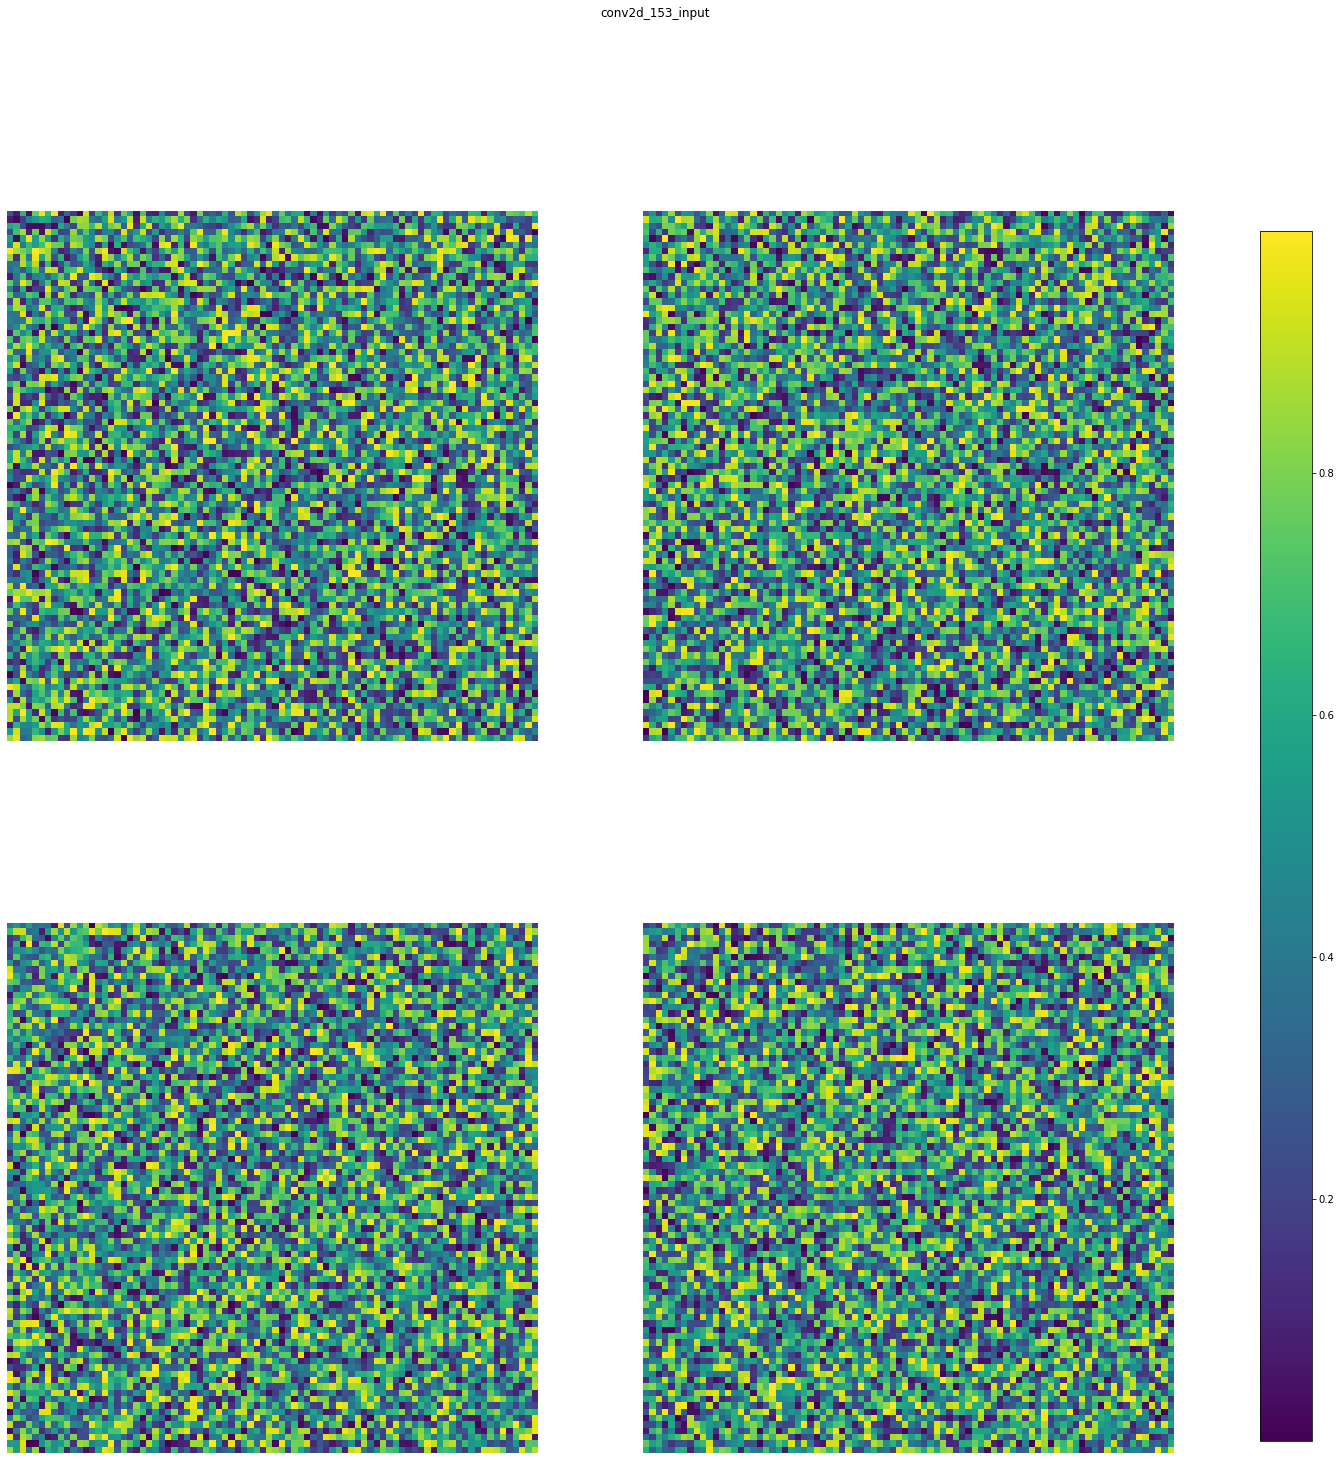

conv2d_153 (1, 20, 20, 32) 


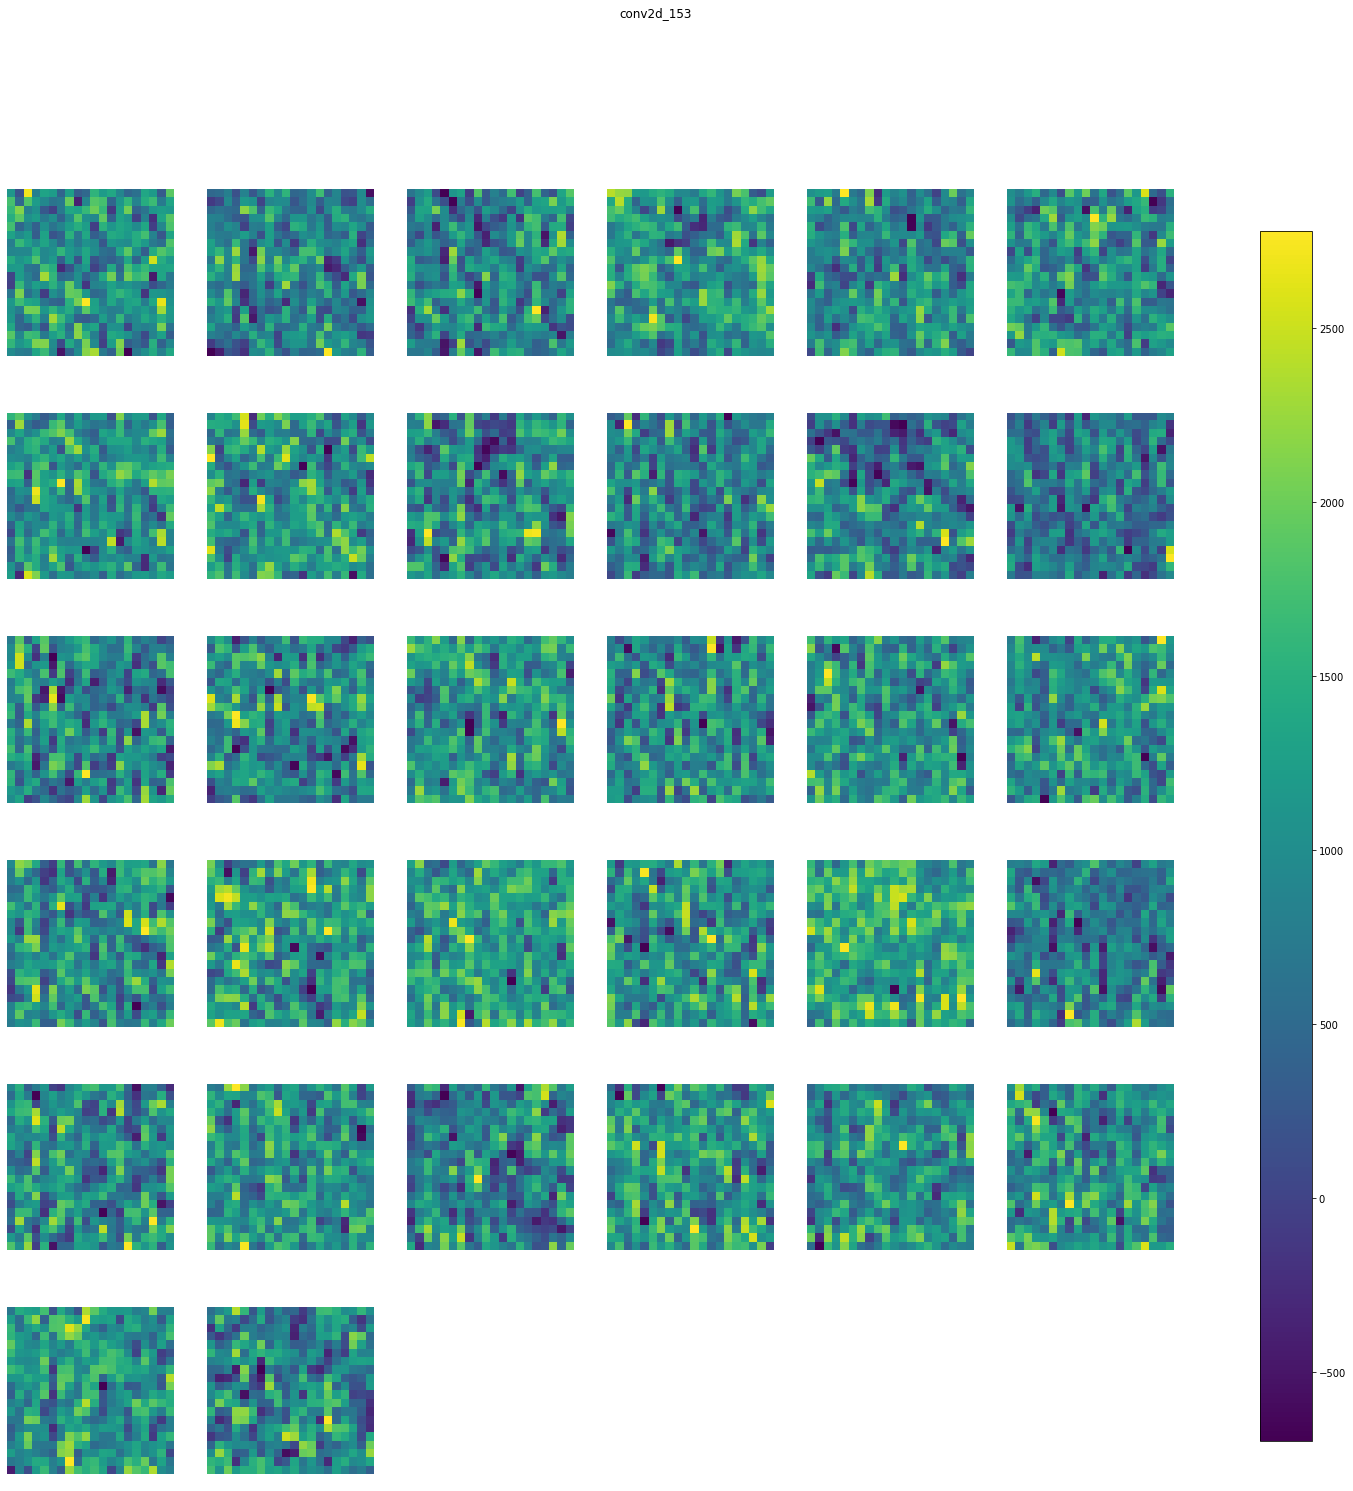

batch_normalization_255 (1, 20, 20, 32) 


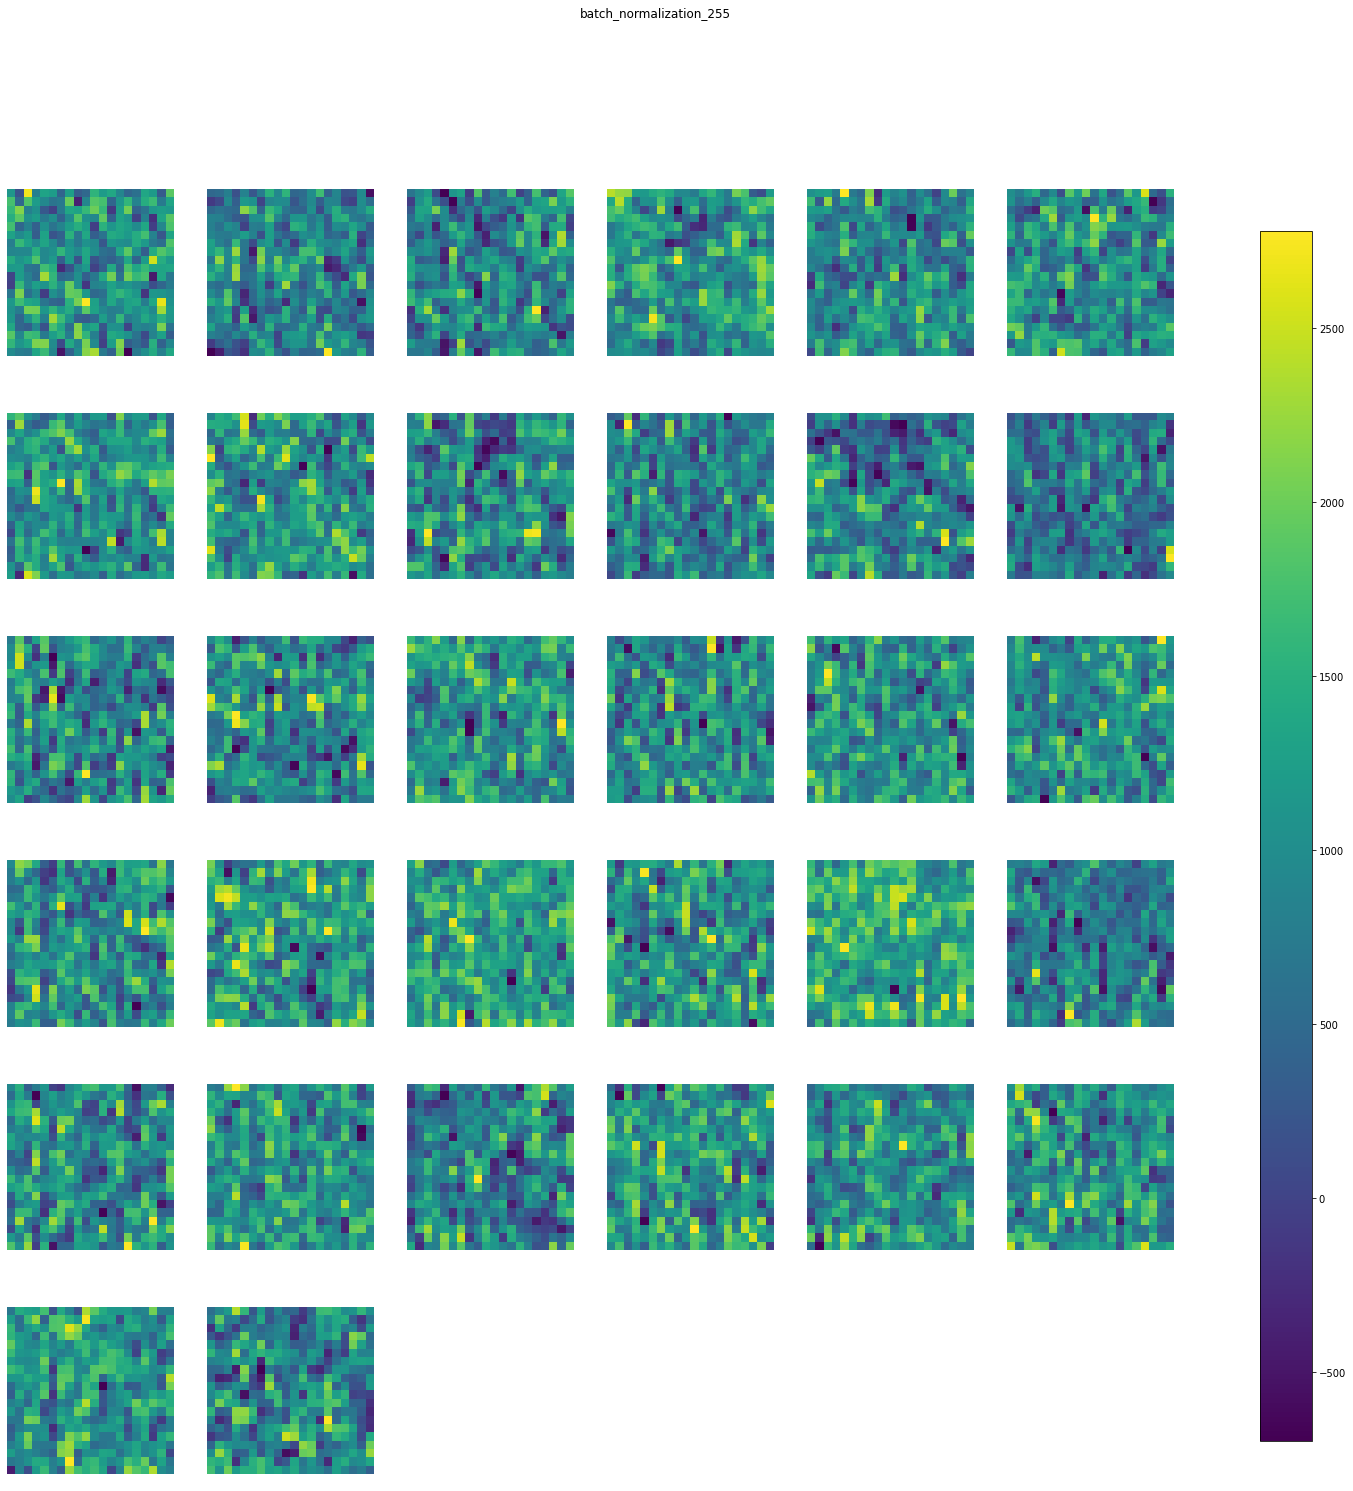

activation_255 (1, 20, 20, 32) 


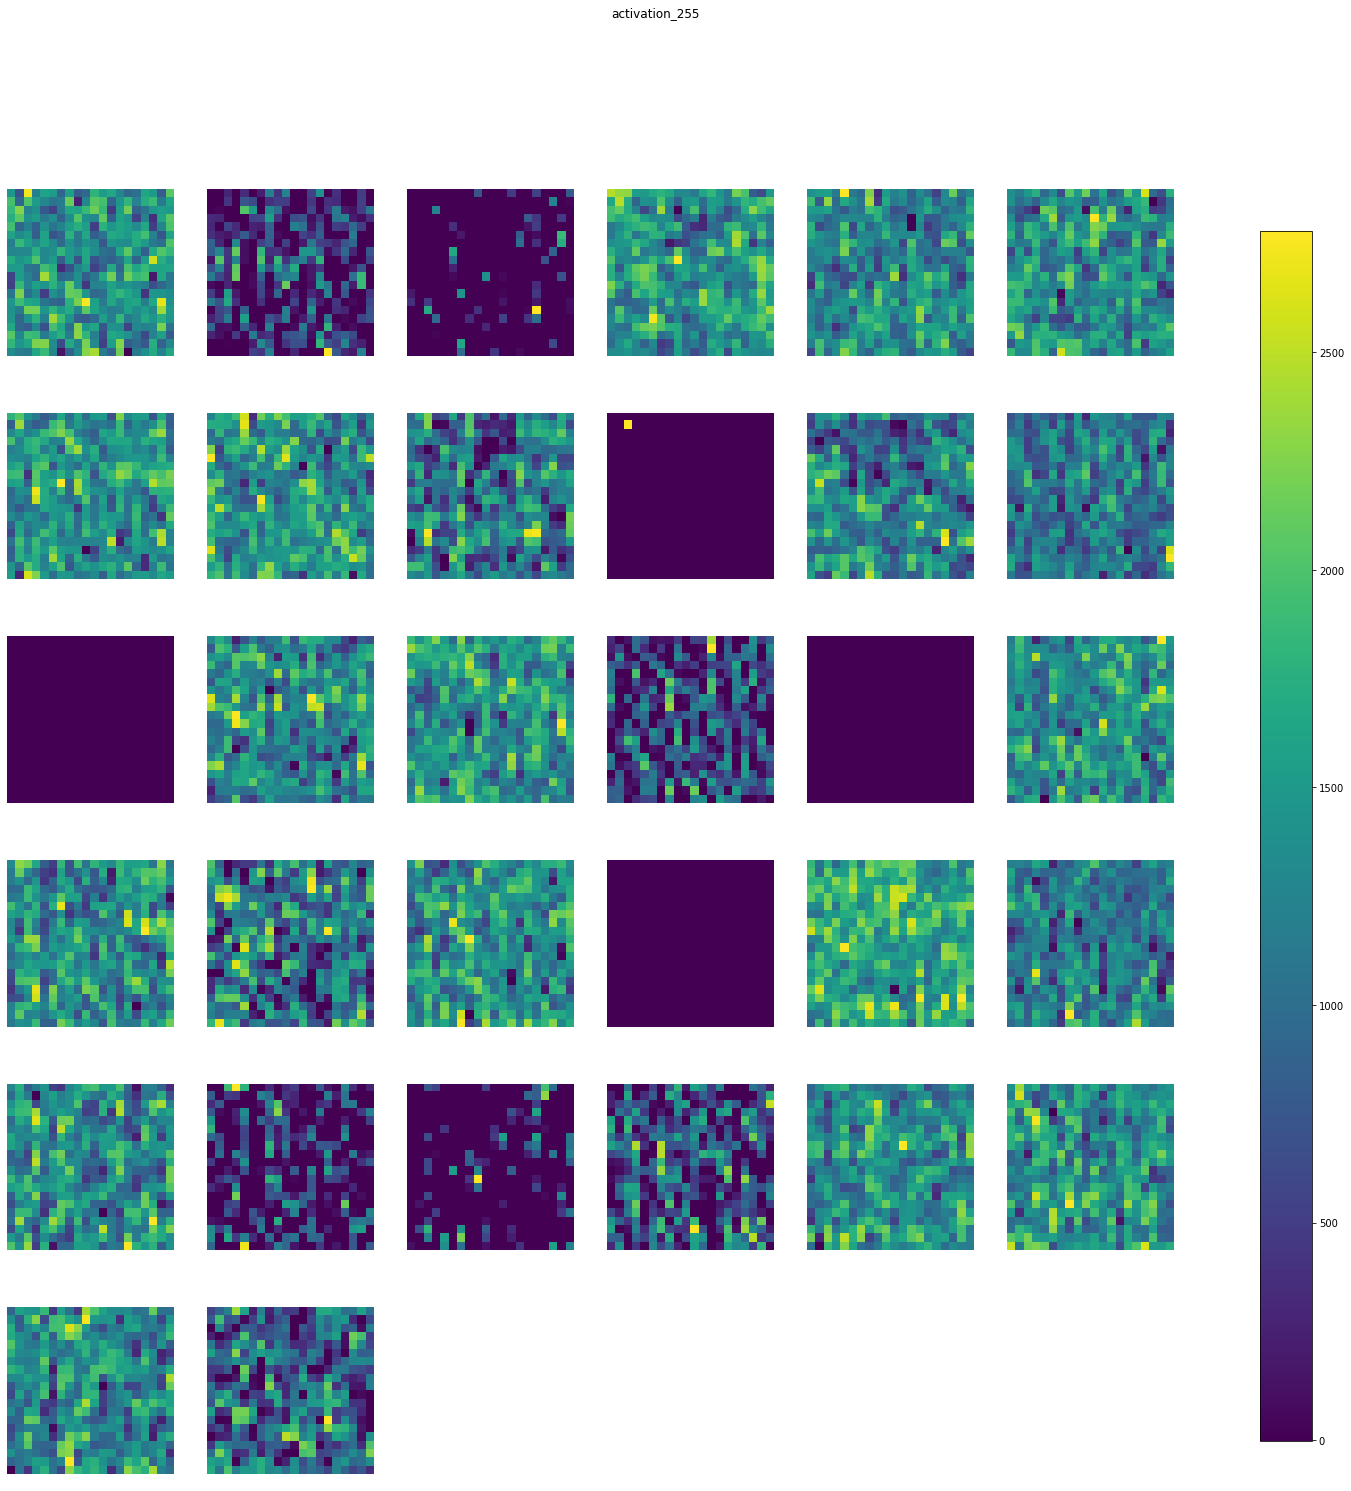

conv2d_154 (1, 9, 9, 64) 


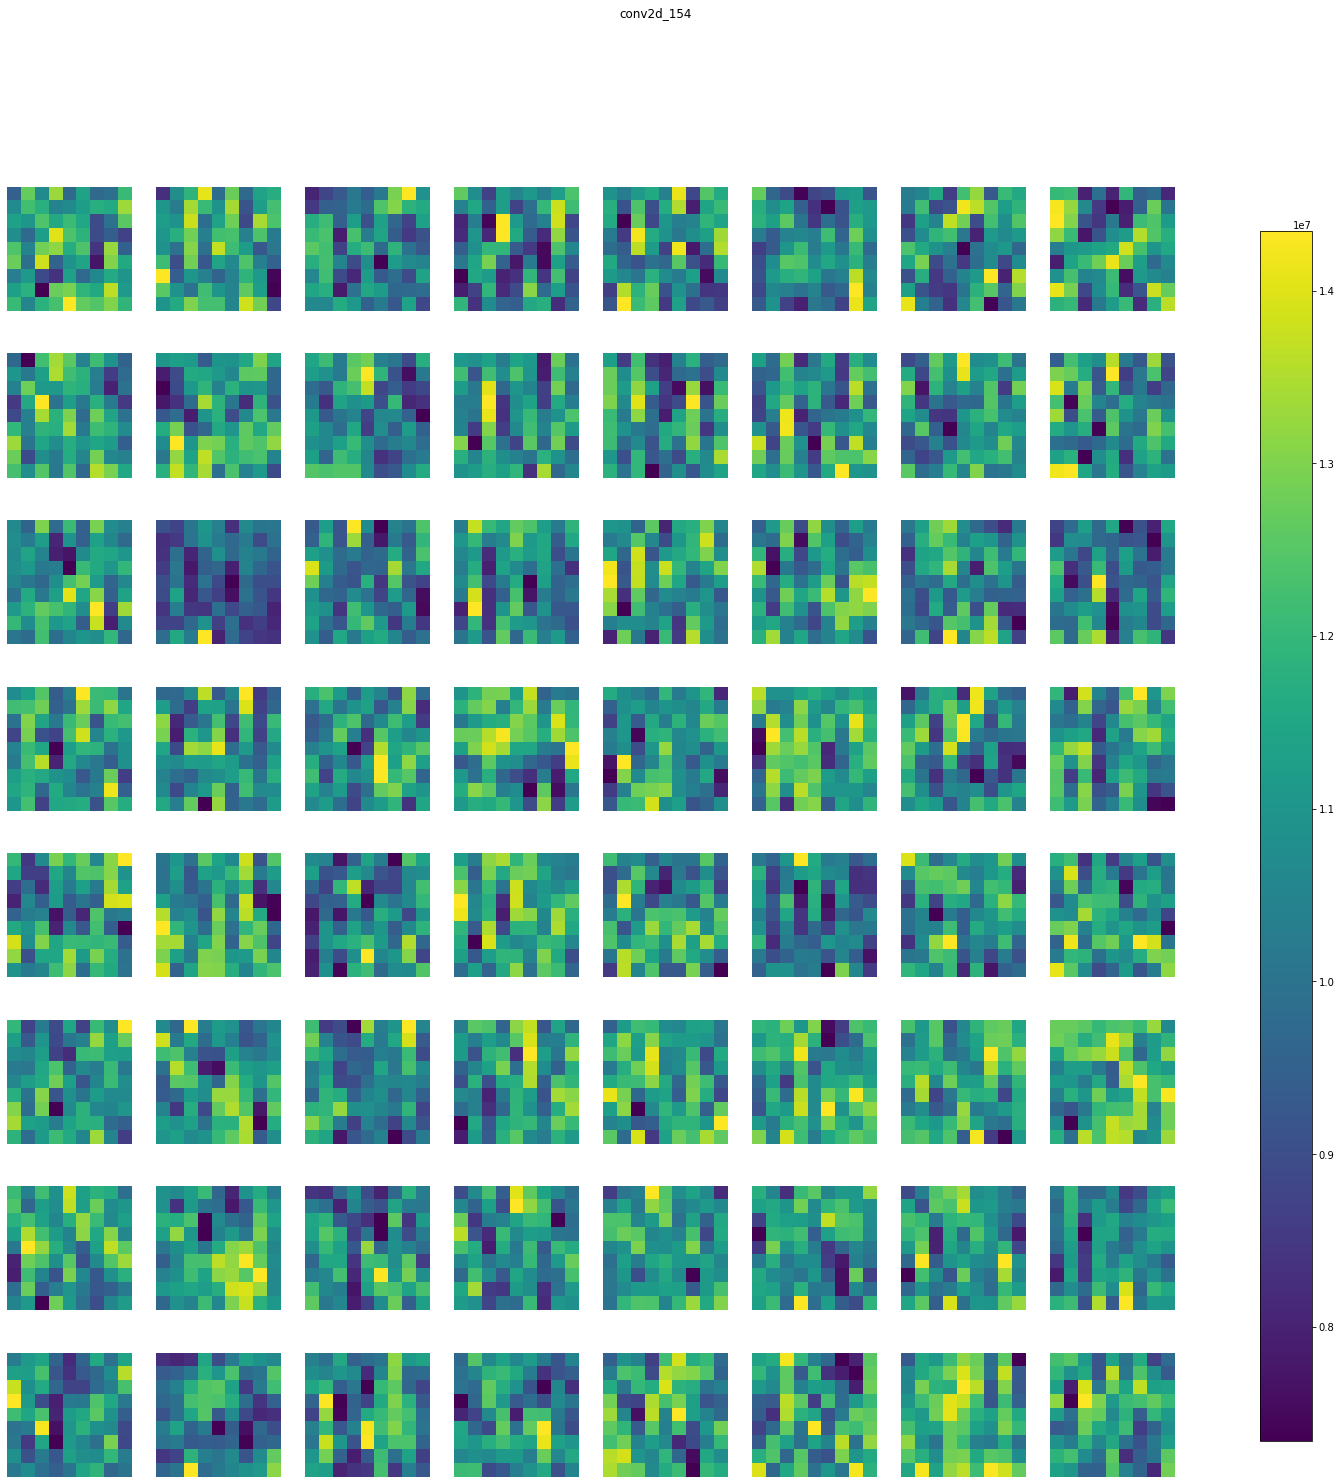

batch_normalization_256 (1, 9, 9, 64) 


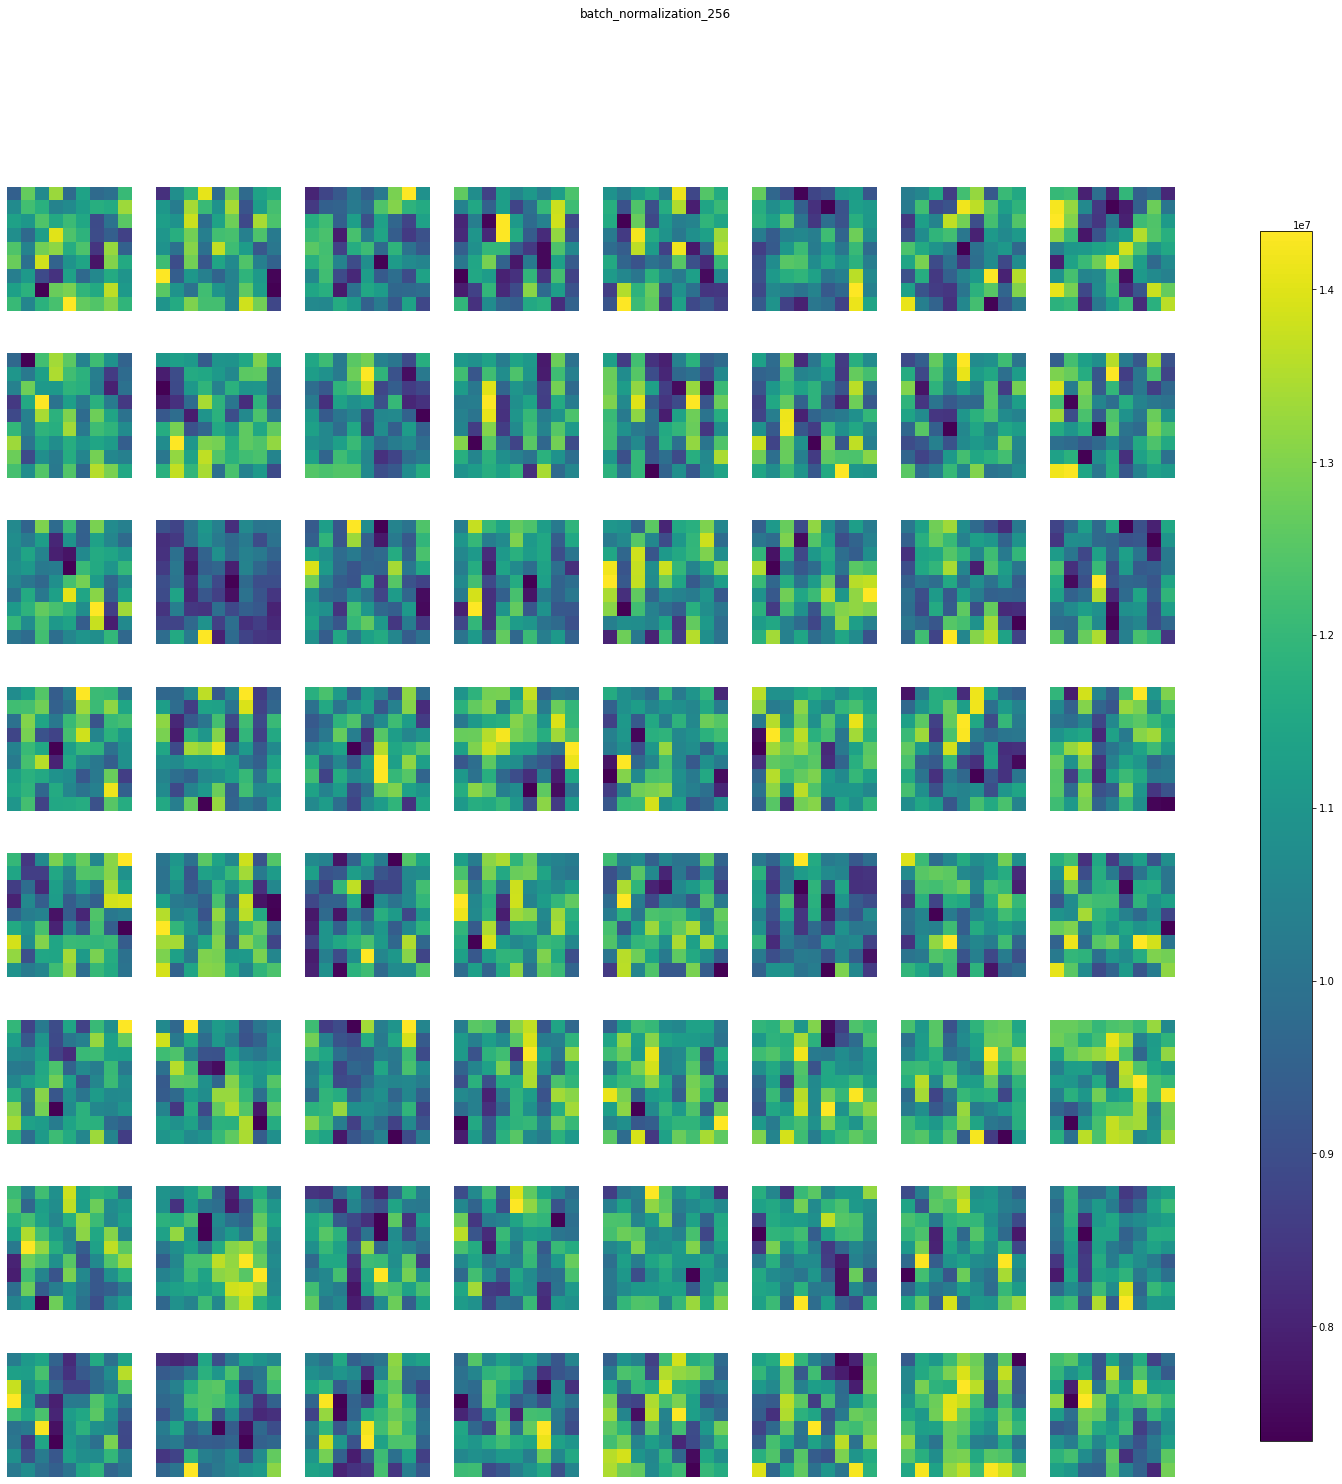

activation_256 (1, 9, 9, 64) 


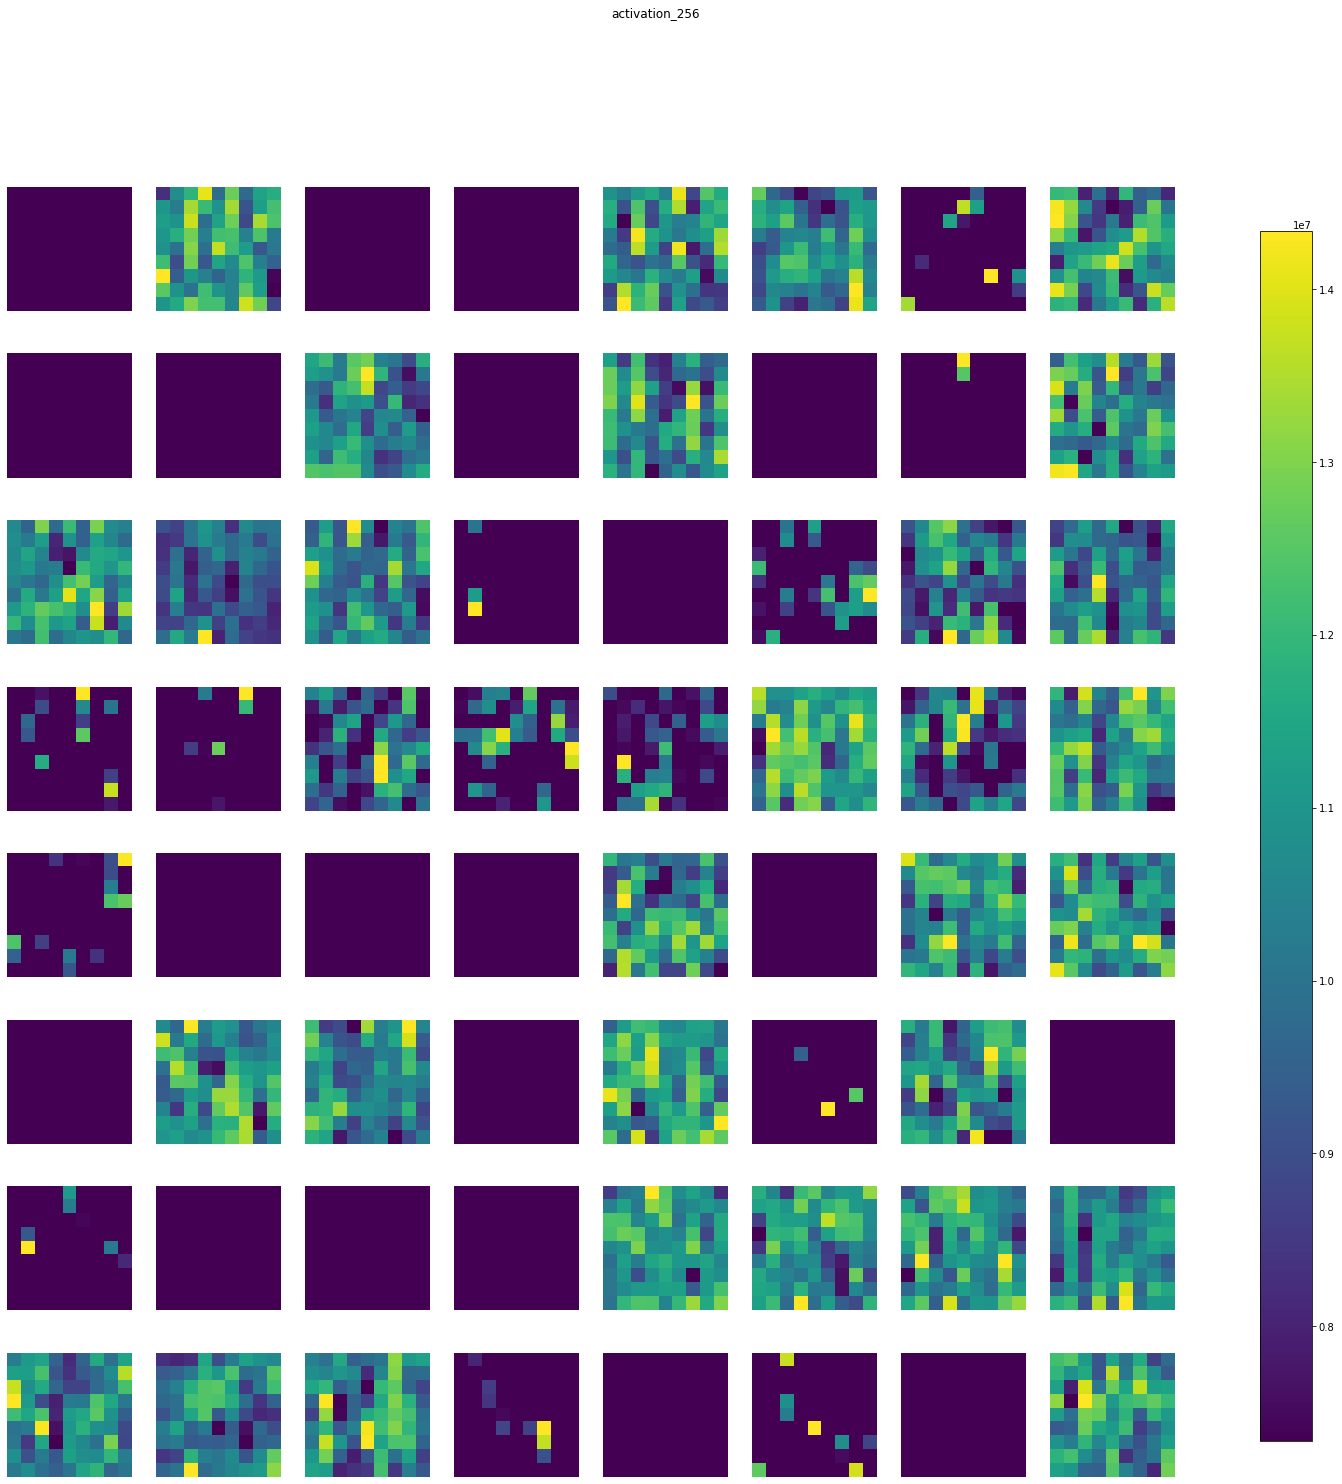

conv2d_155 (1, 7, 7, 64) 


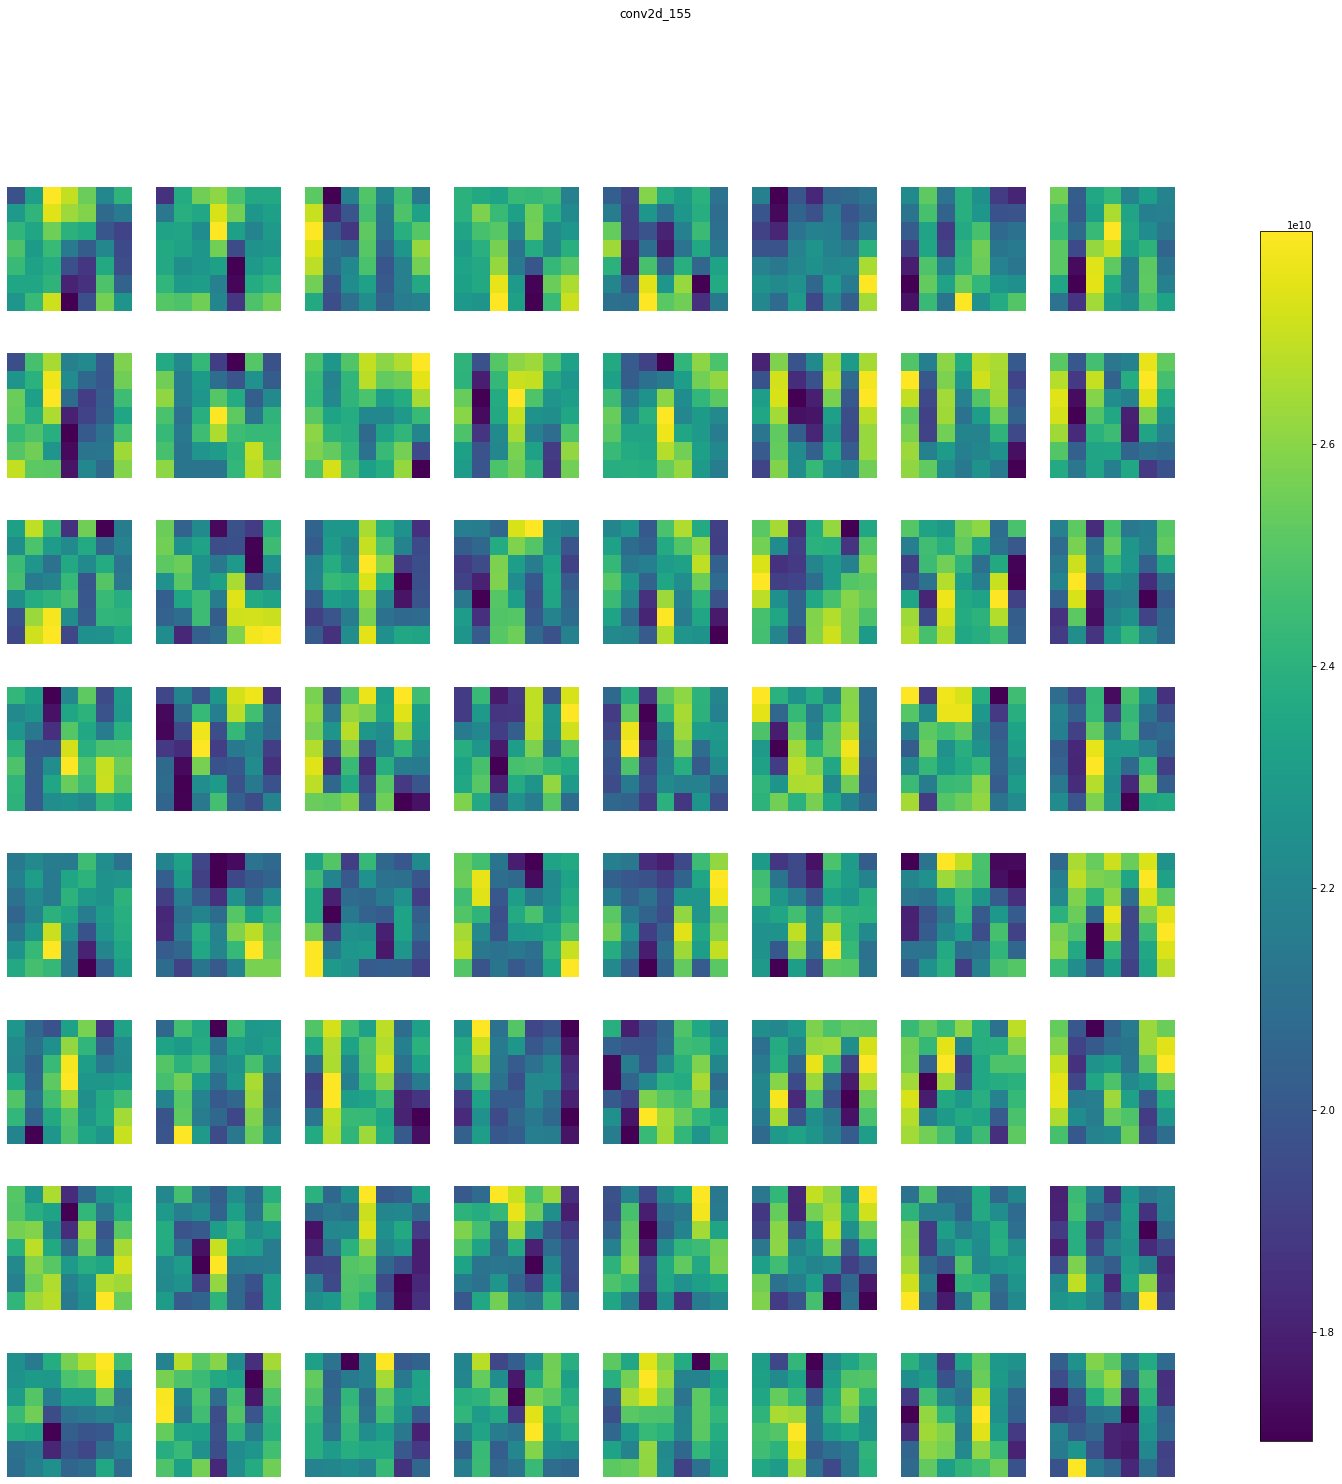

batch_normalization_257 (1, 7, 7, 64) 


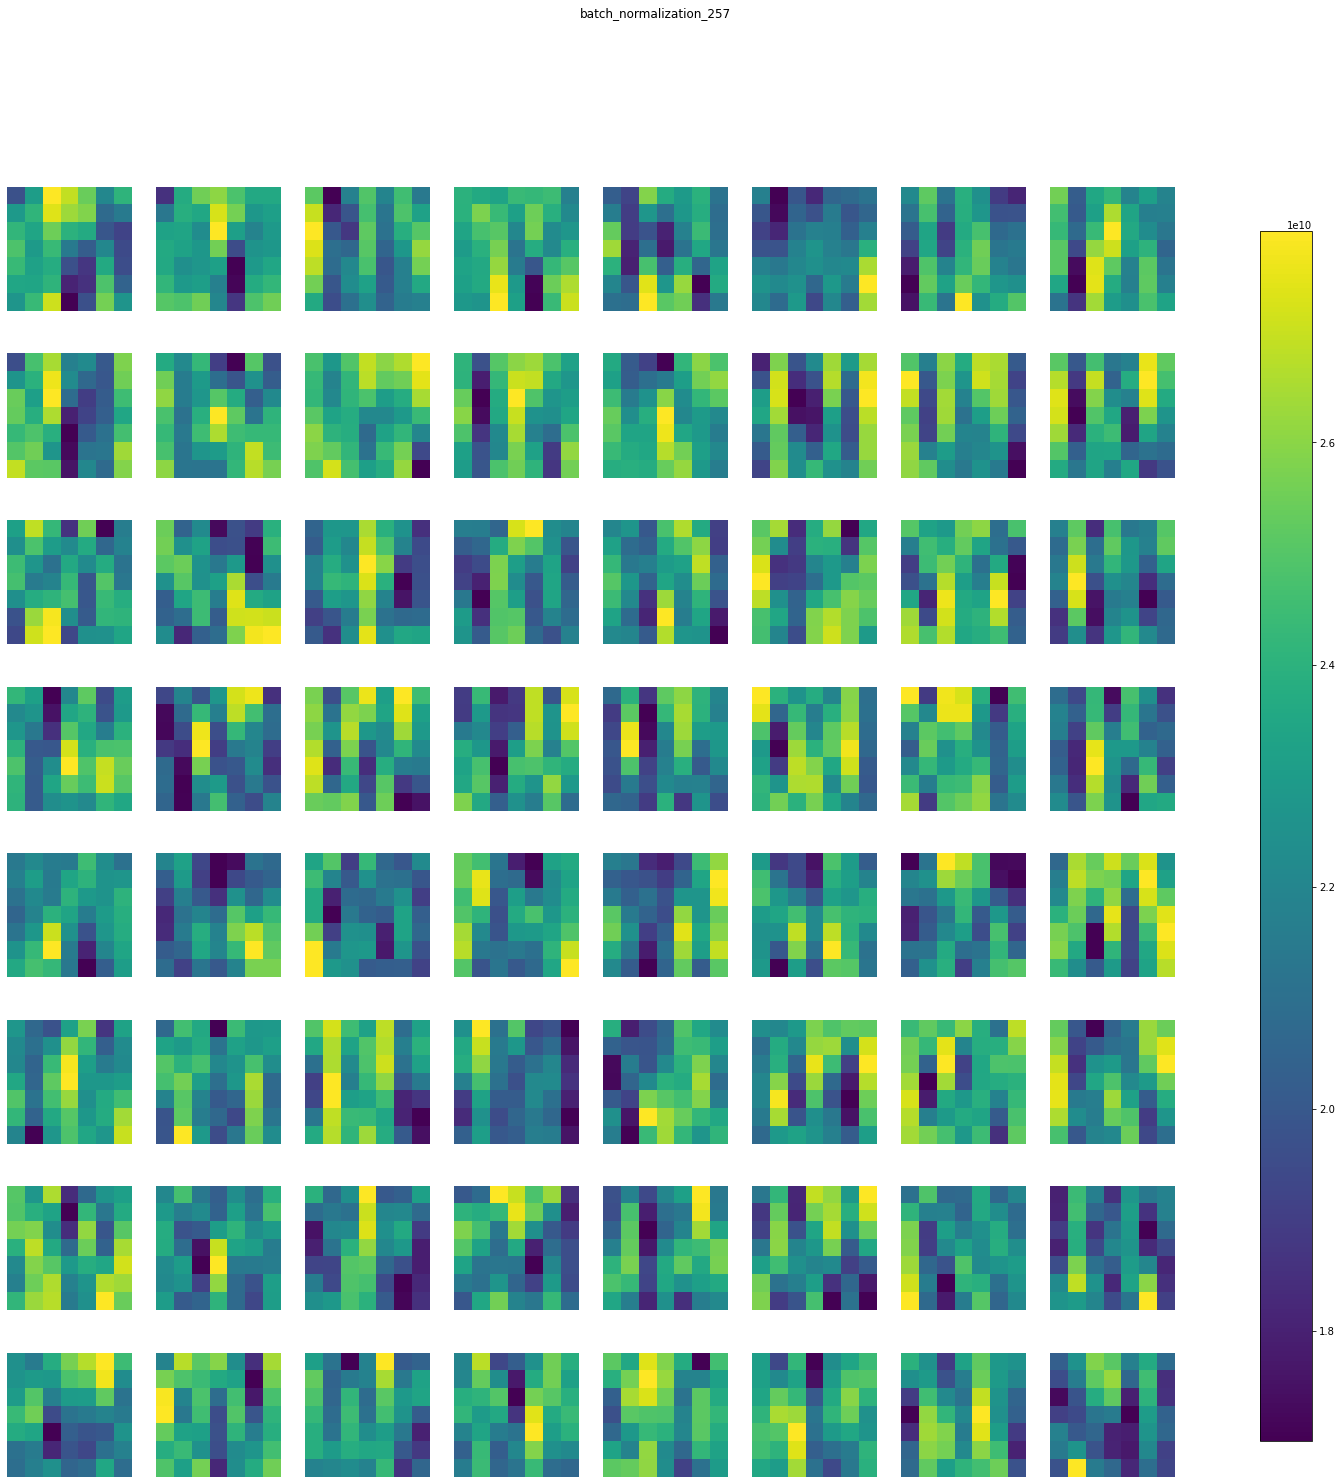

activation_257 (1, 7, 7, 64) 


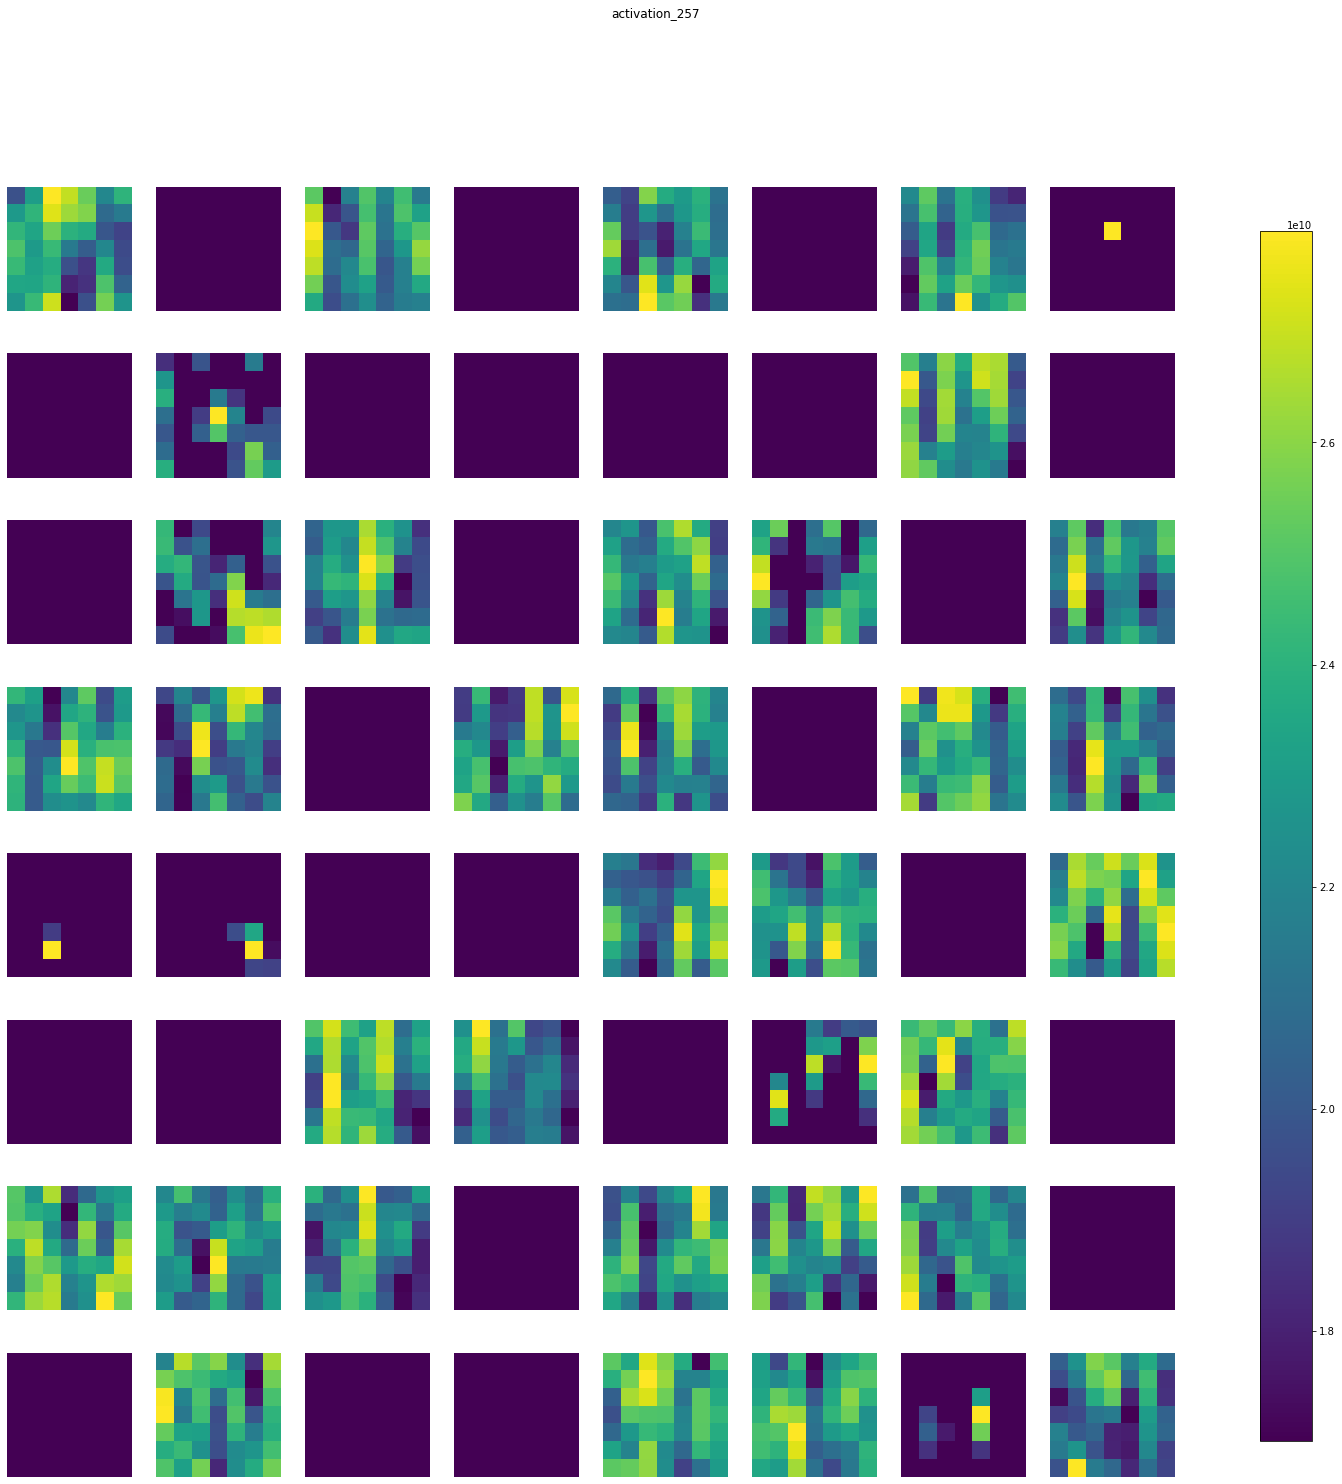

flatten_51 (1, 3136) 


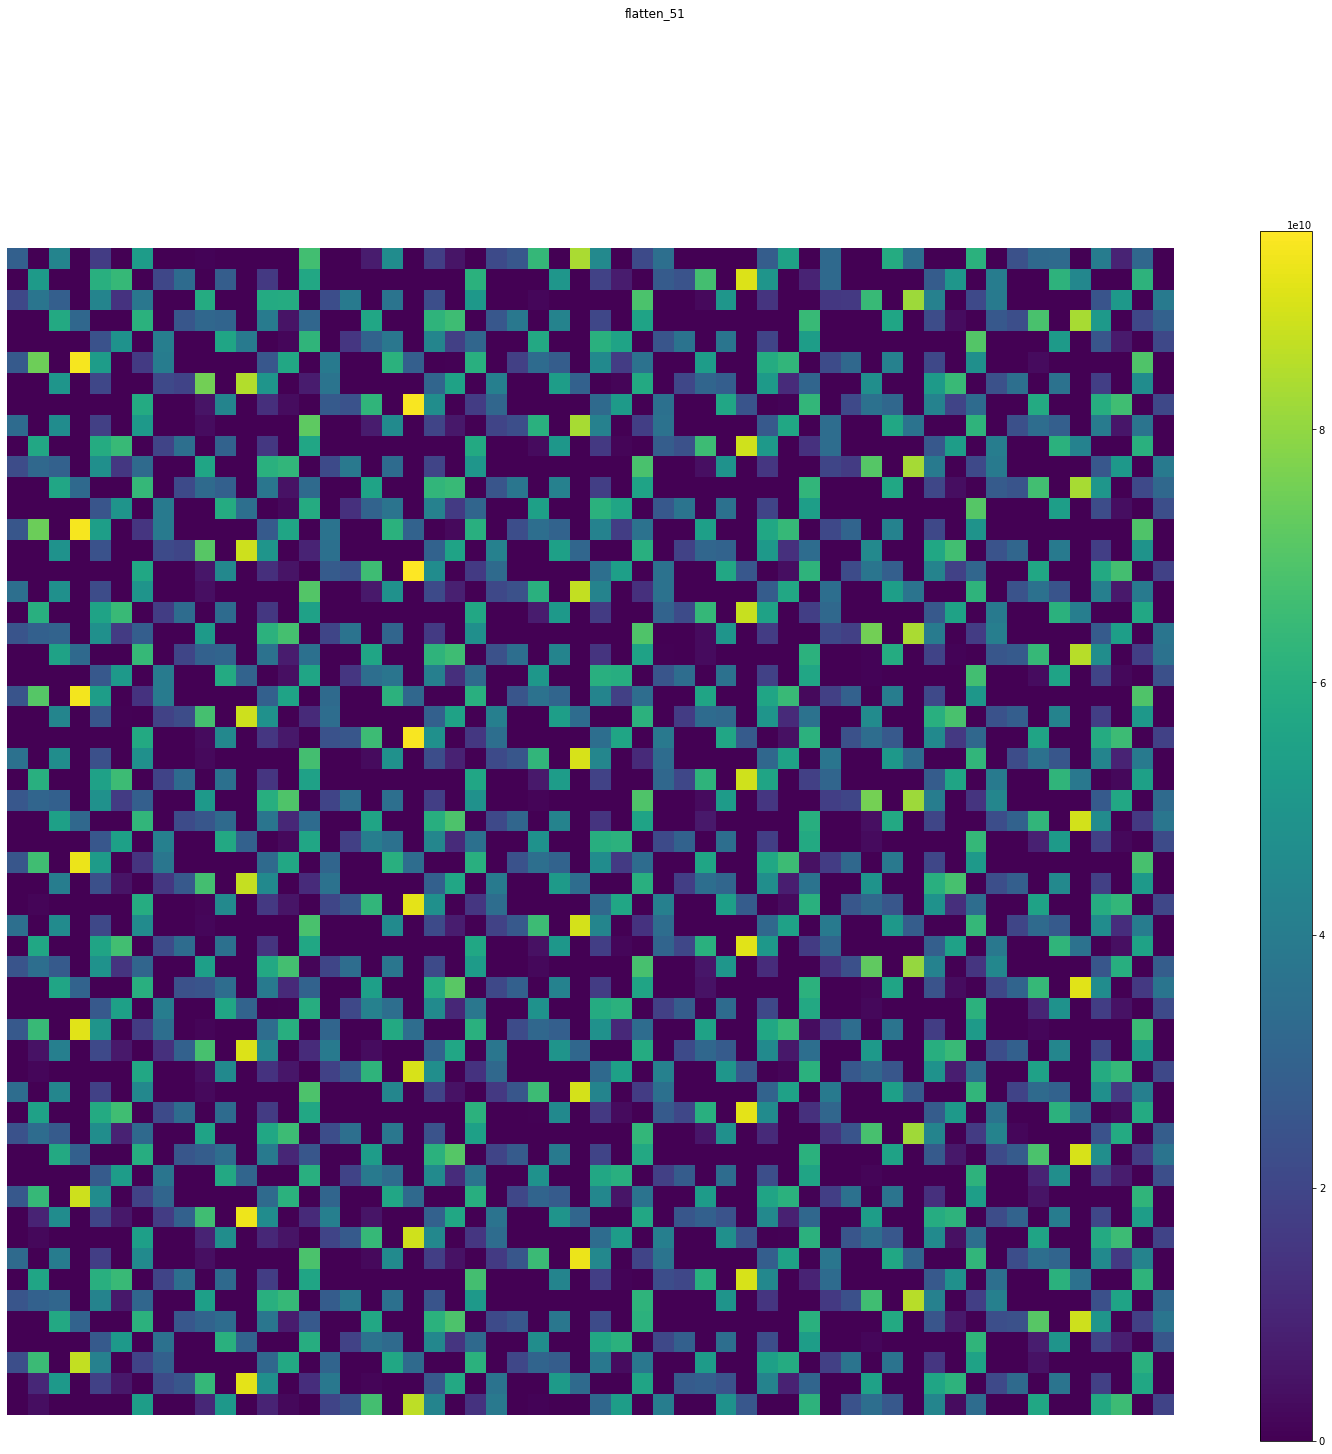

dense_102 (1, 512) 


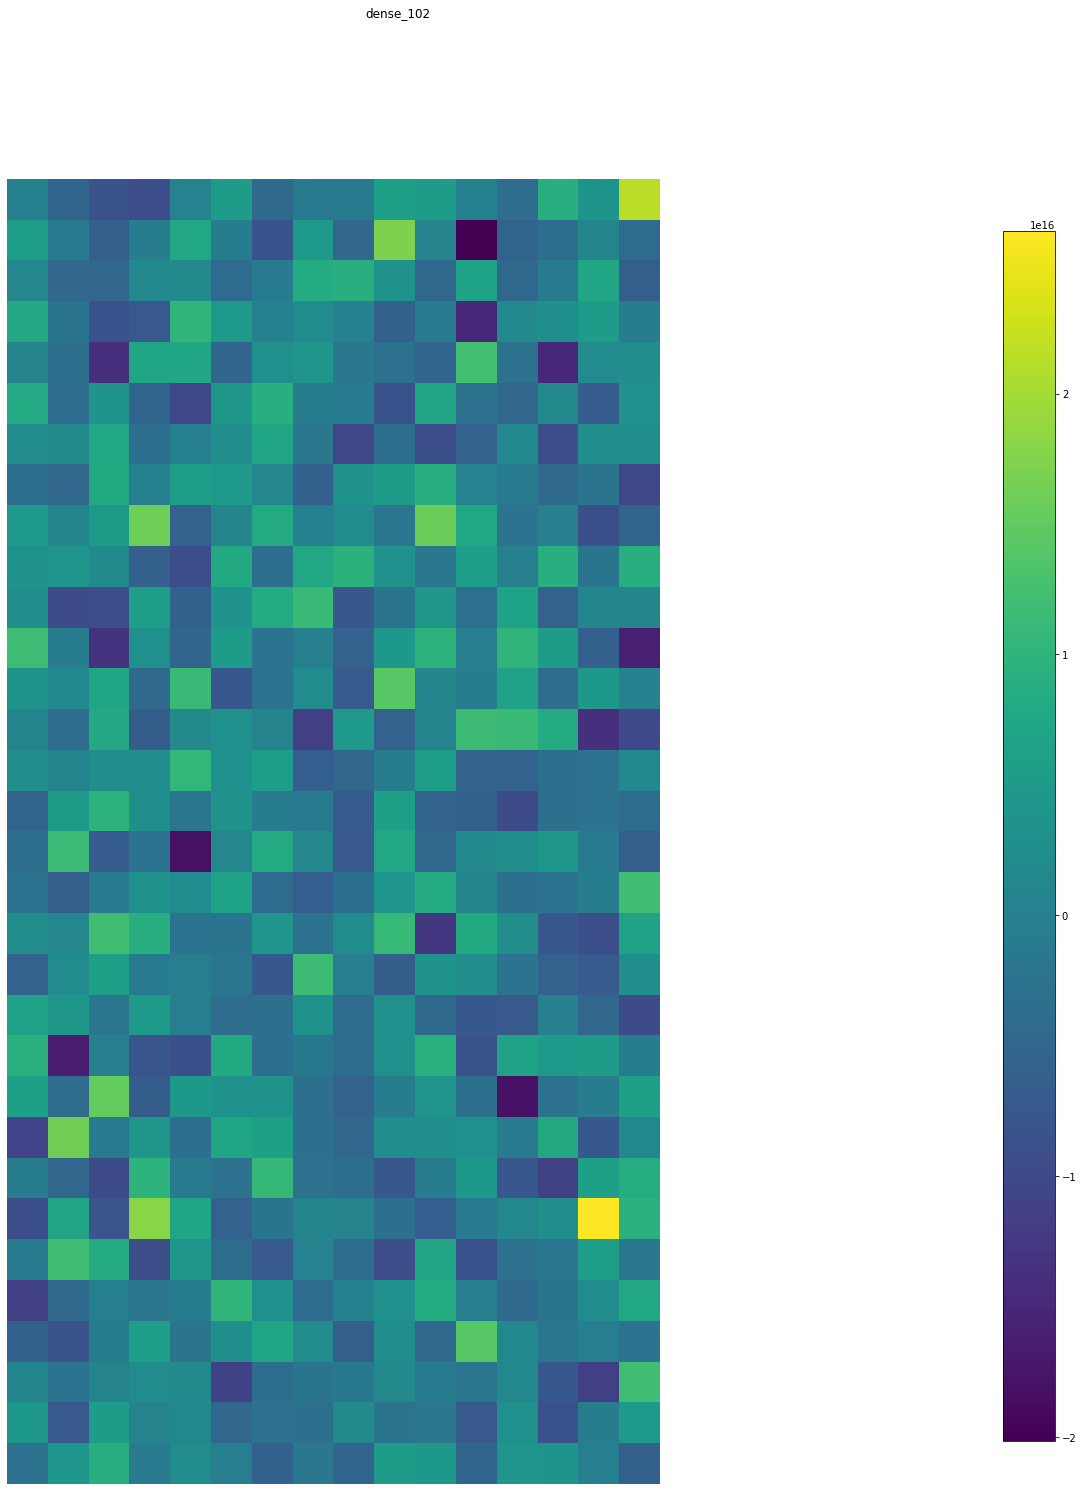

batch_normalization_258 (1, 512) 


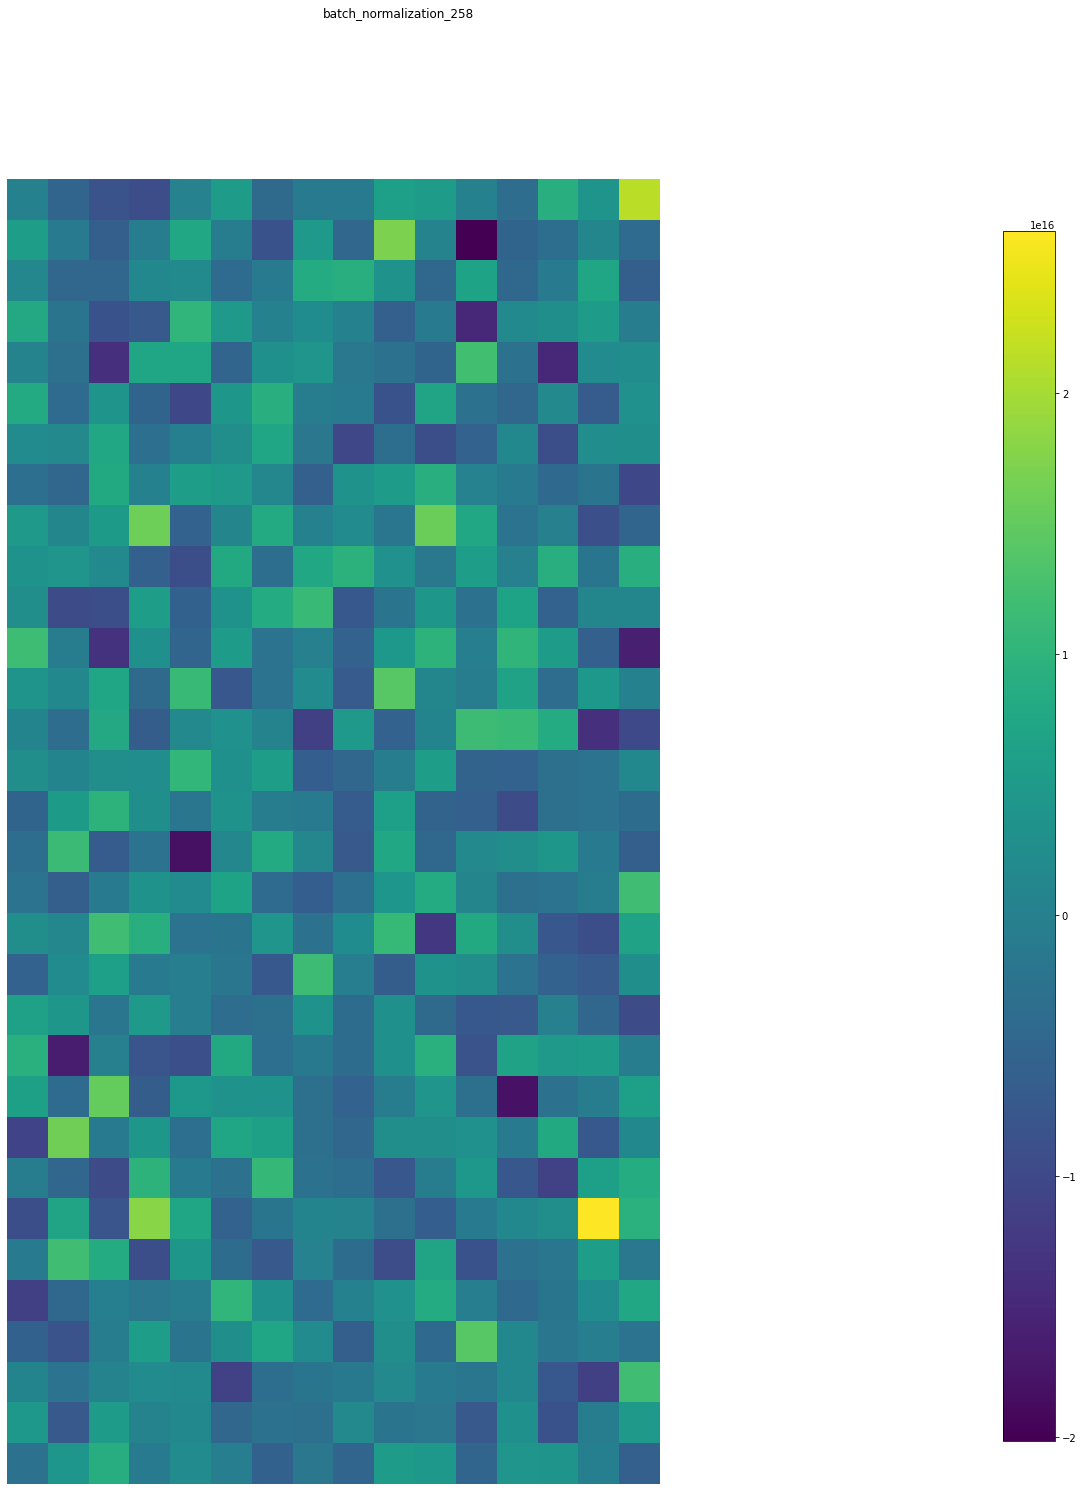

activation_258 (1, 512) 


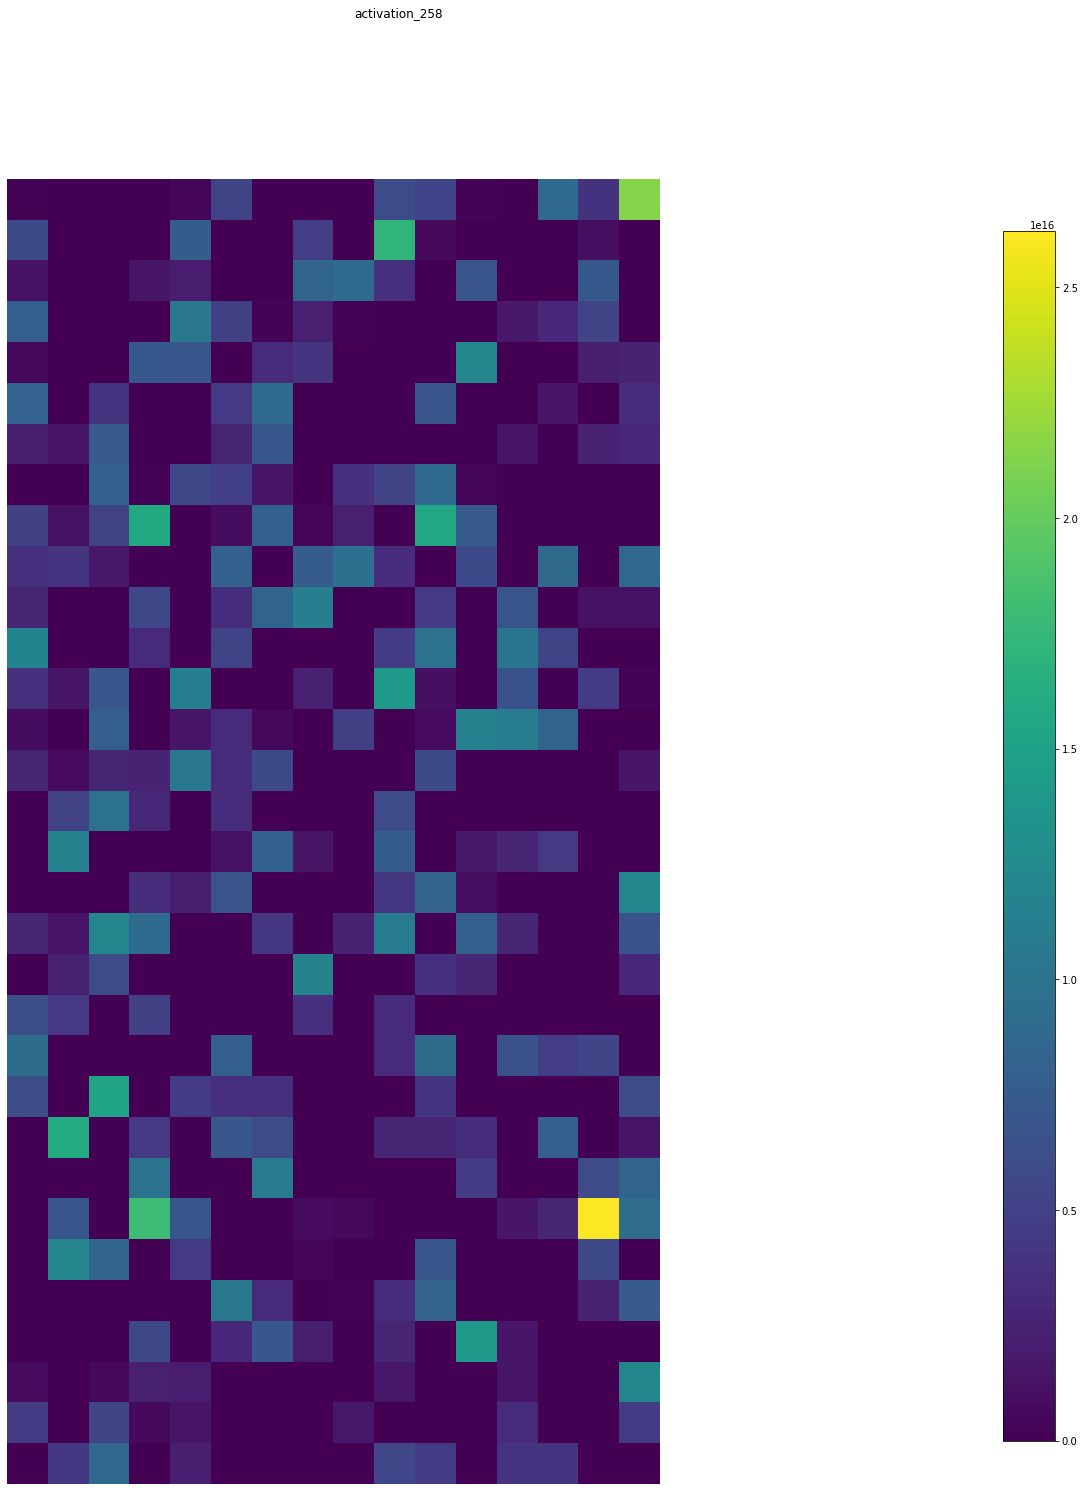

dense_103 (1, 4) 


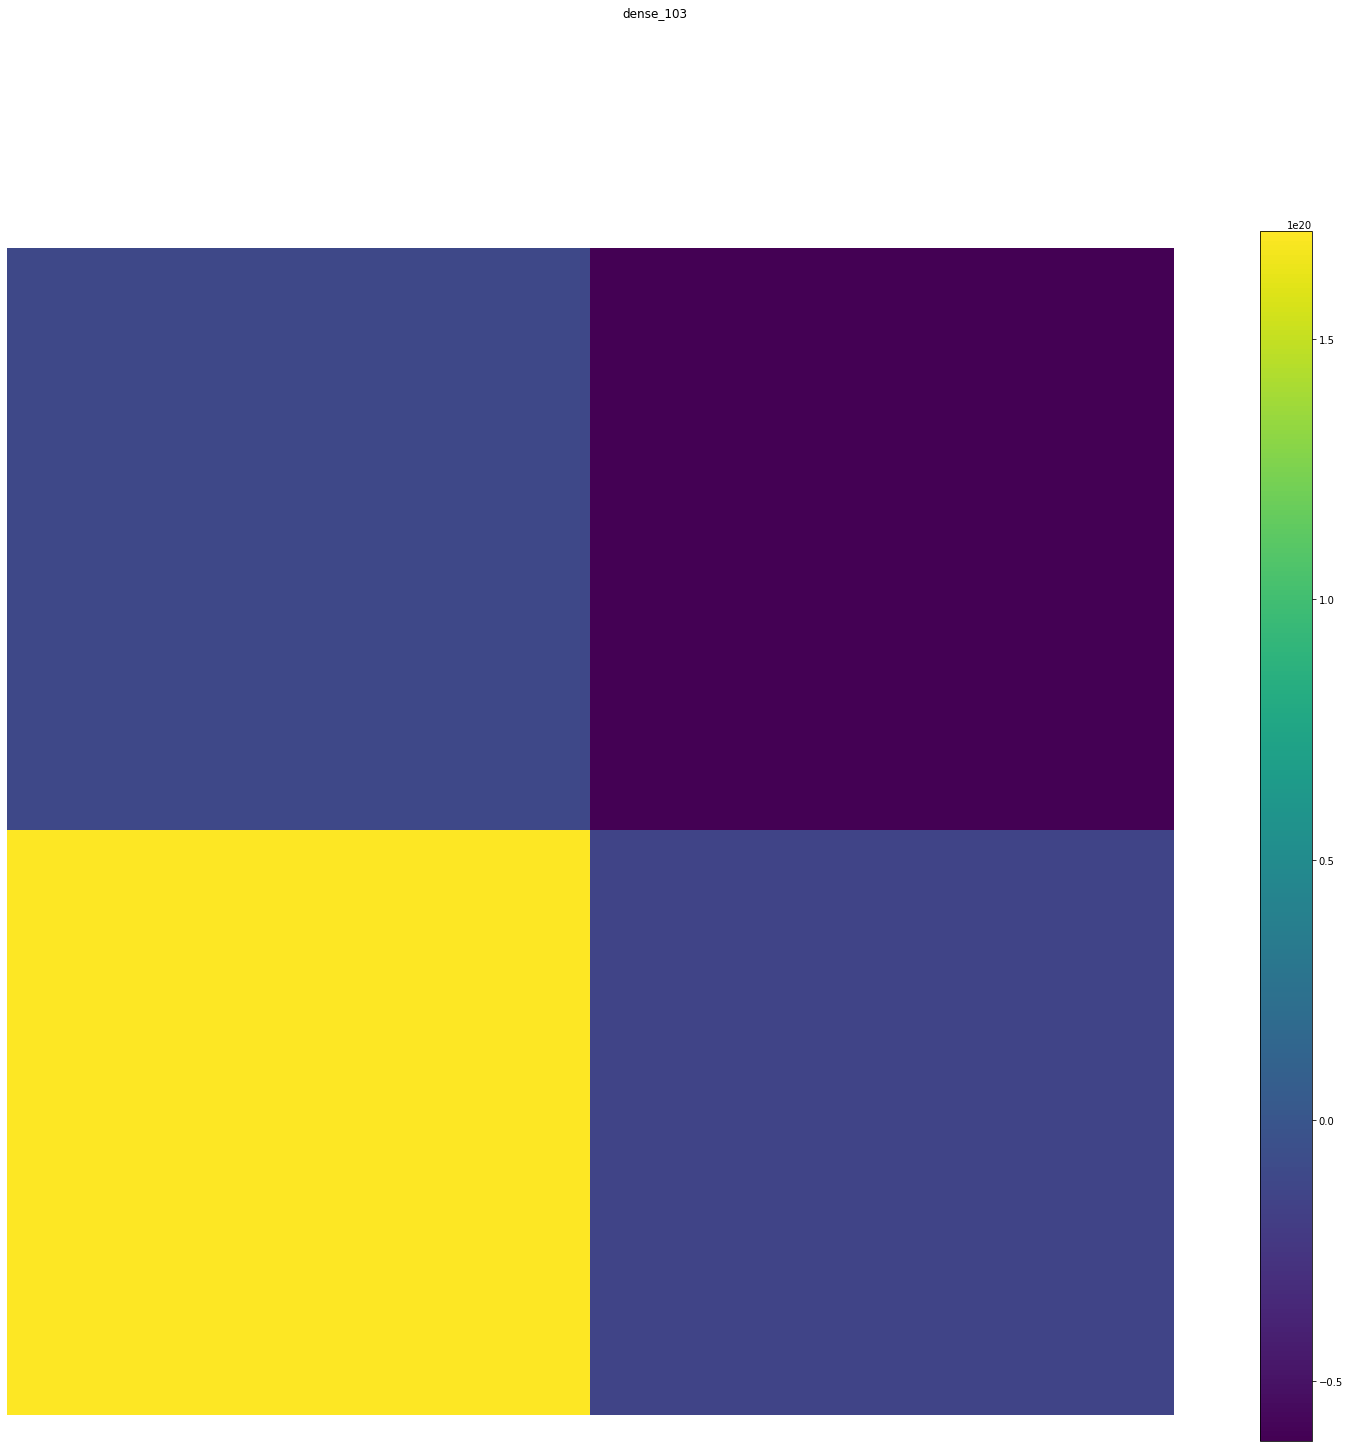

batch_normalization_259 (1, 4) 


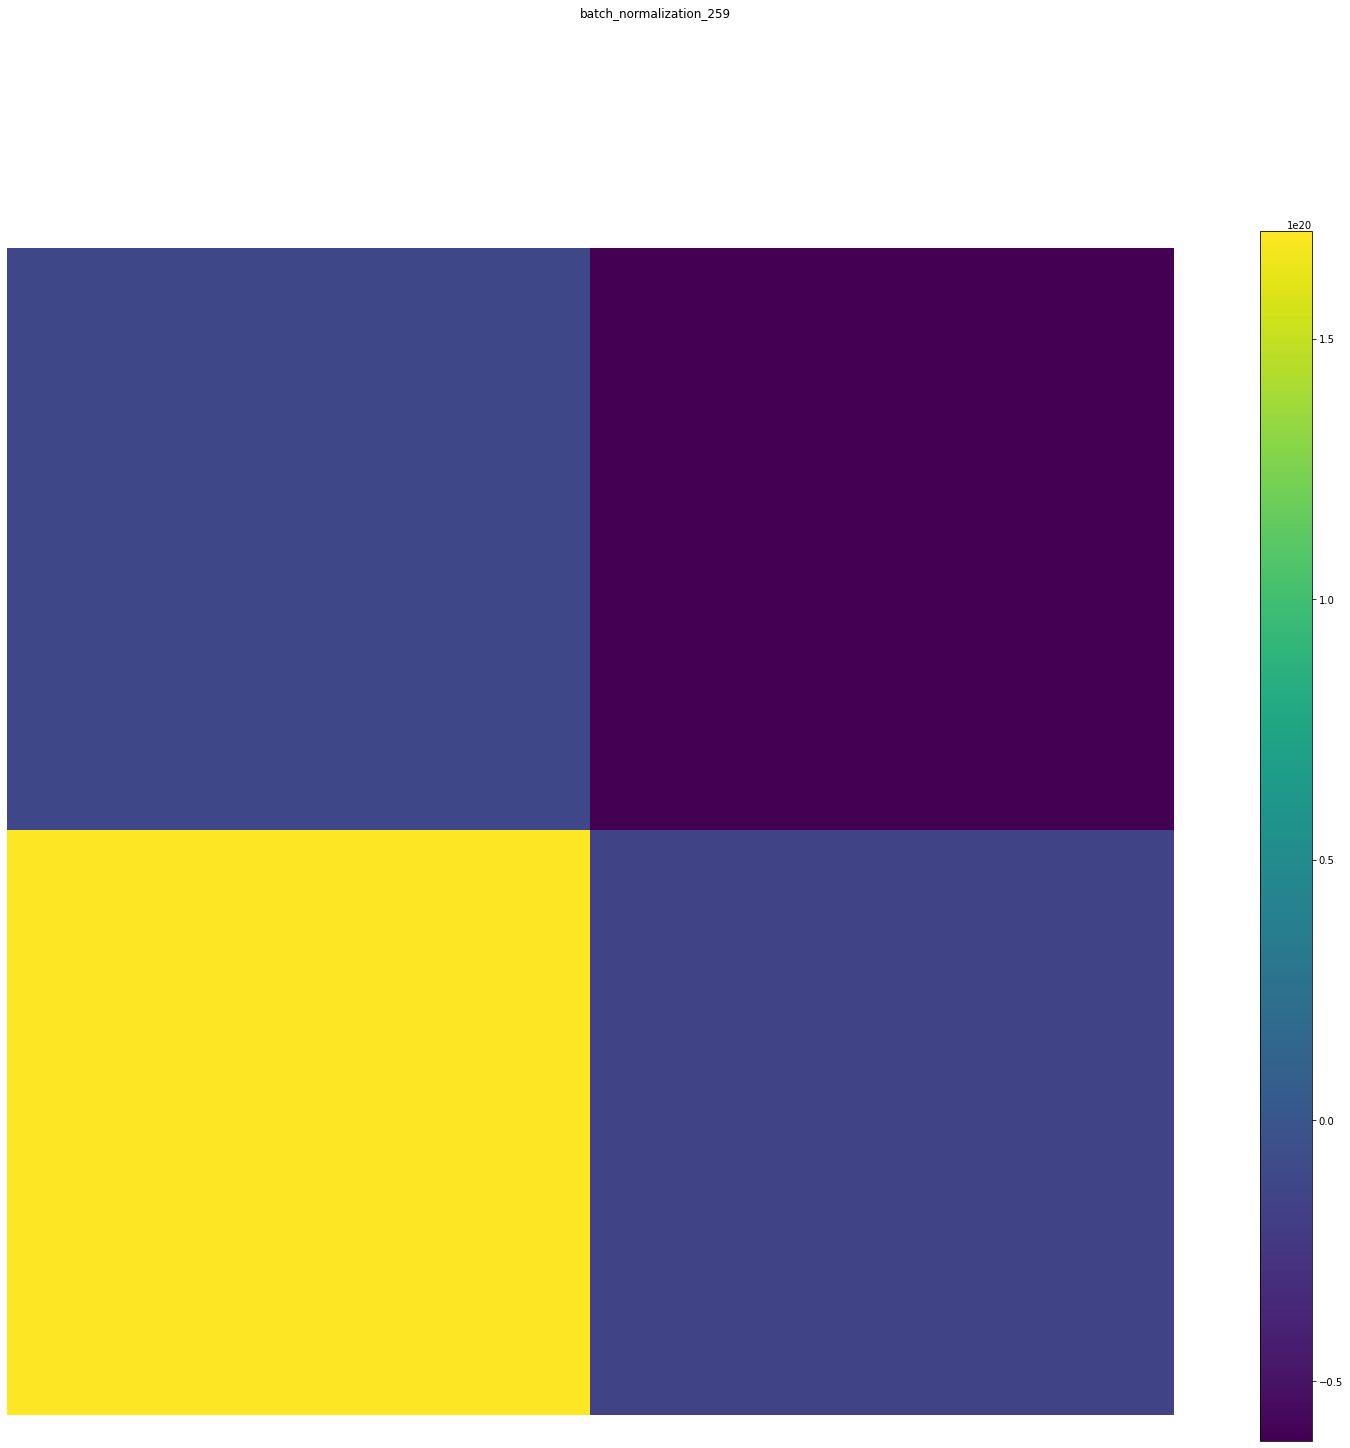

activation_259 (1, 4) 


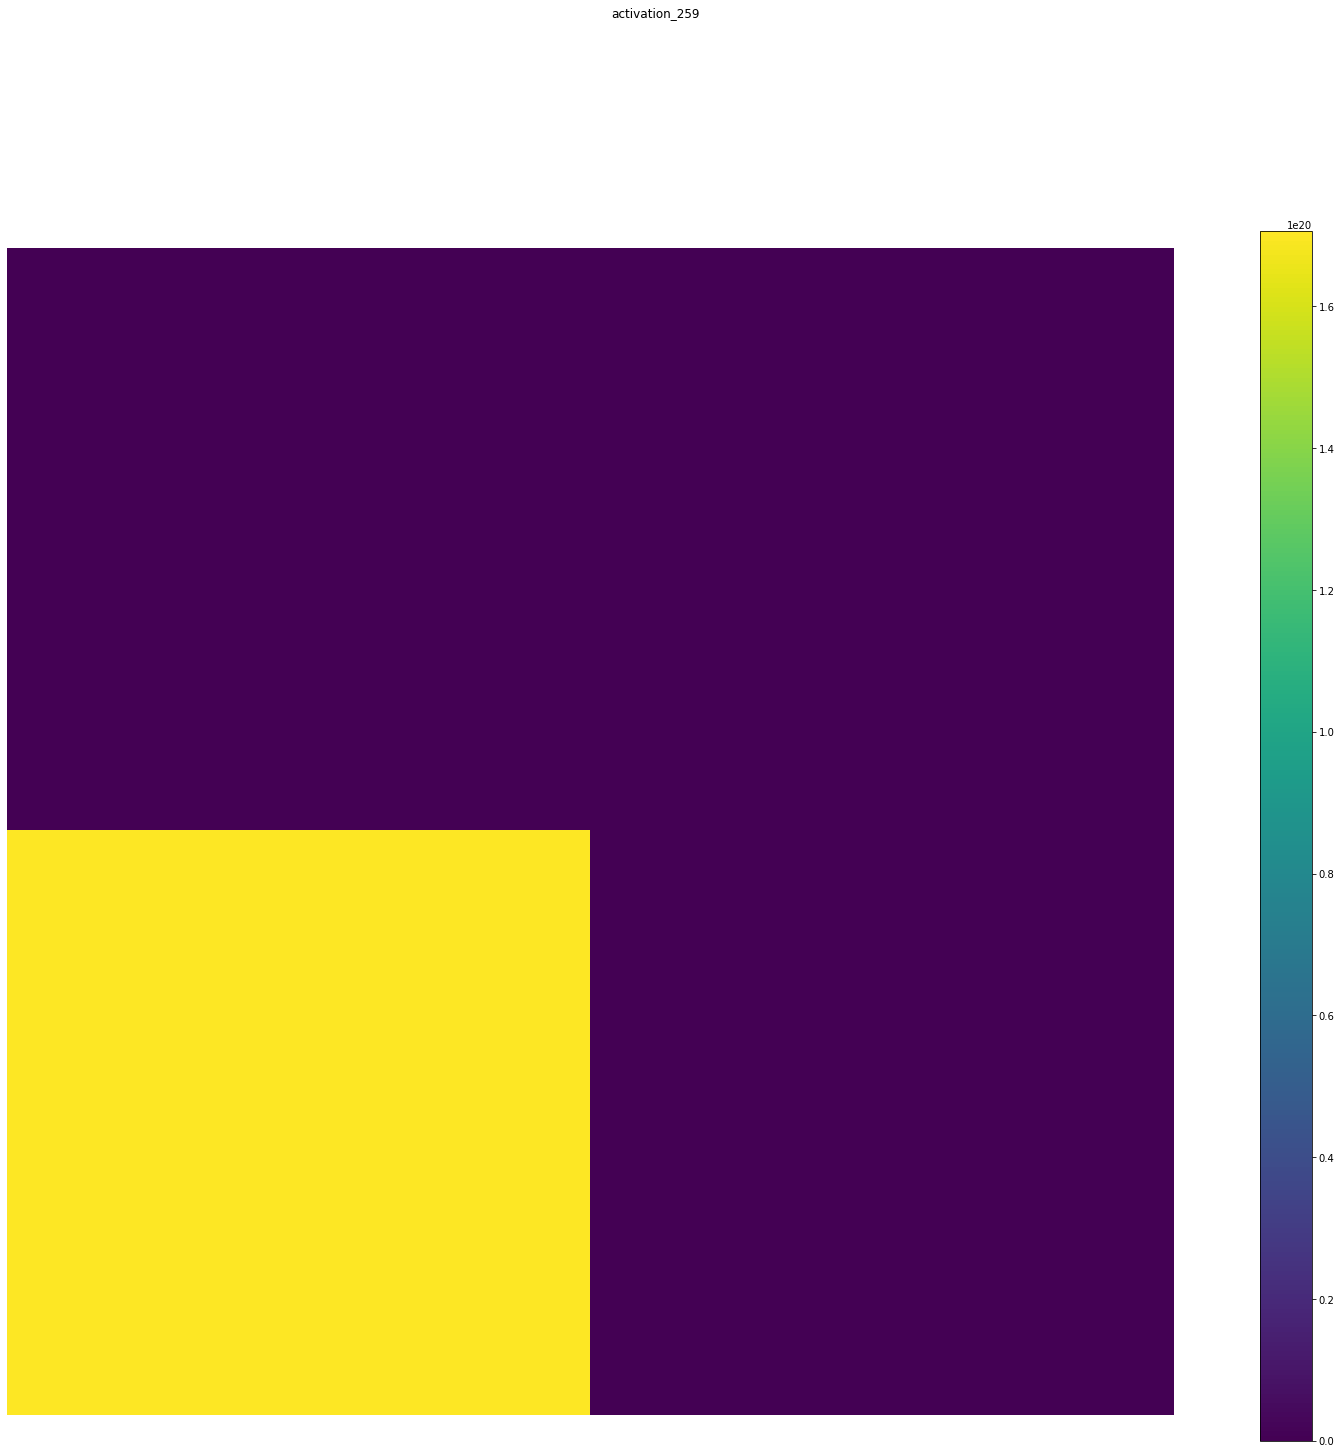

In [38]:
act = keract.get_activations(before,random_test_input)
keract.display_activations(act,reshape_1d_layers=True)

conv2d_153_input (1, 84, 84, 4) 


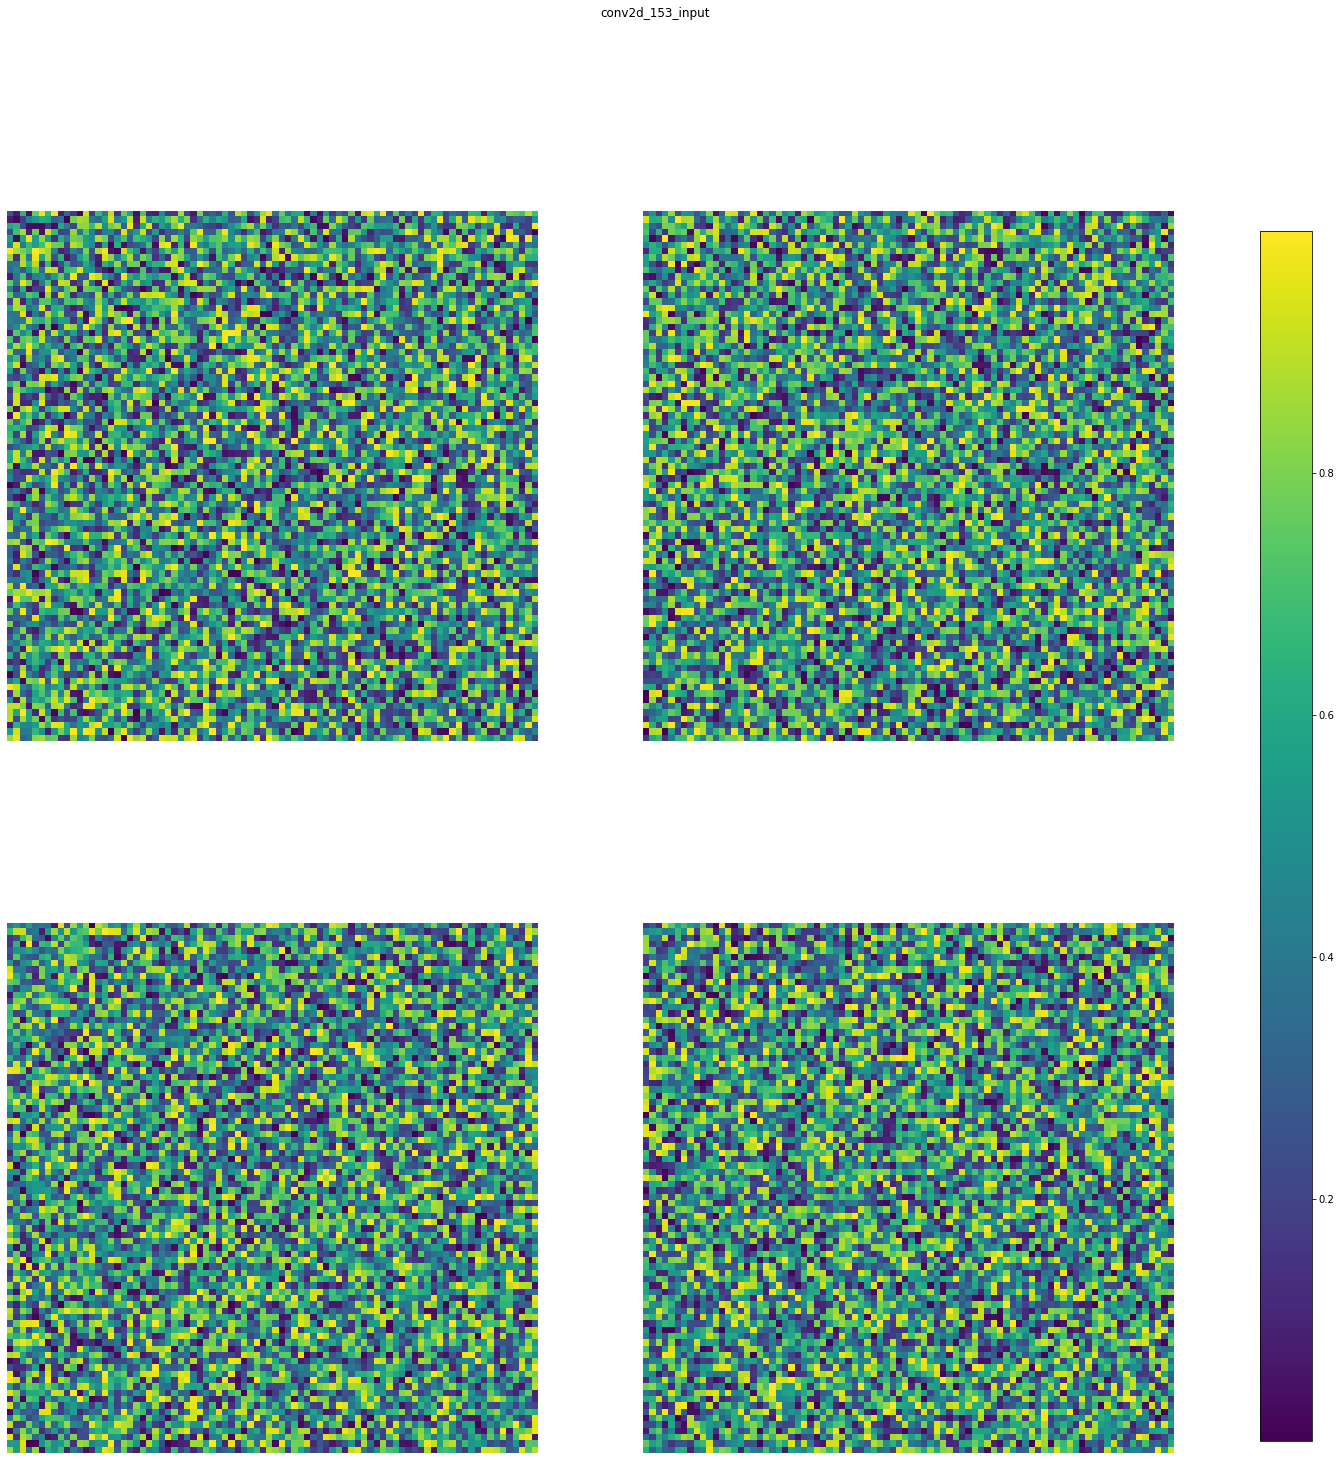

conv2d_153 (1, 20, 20, 32) 


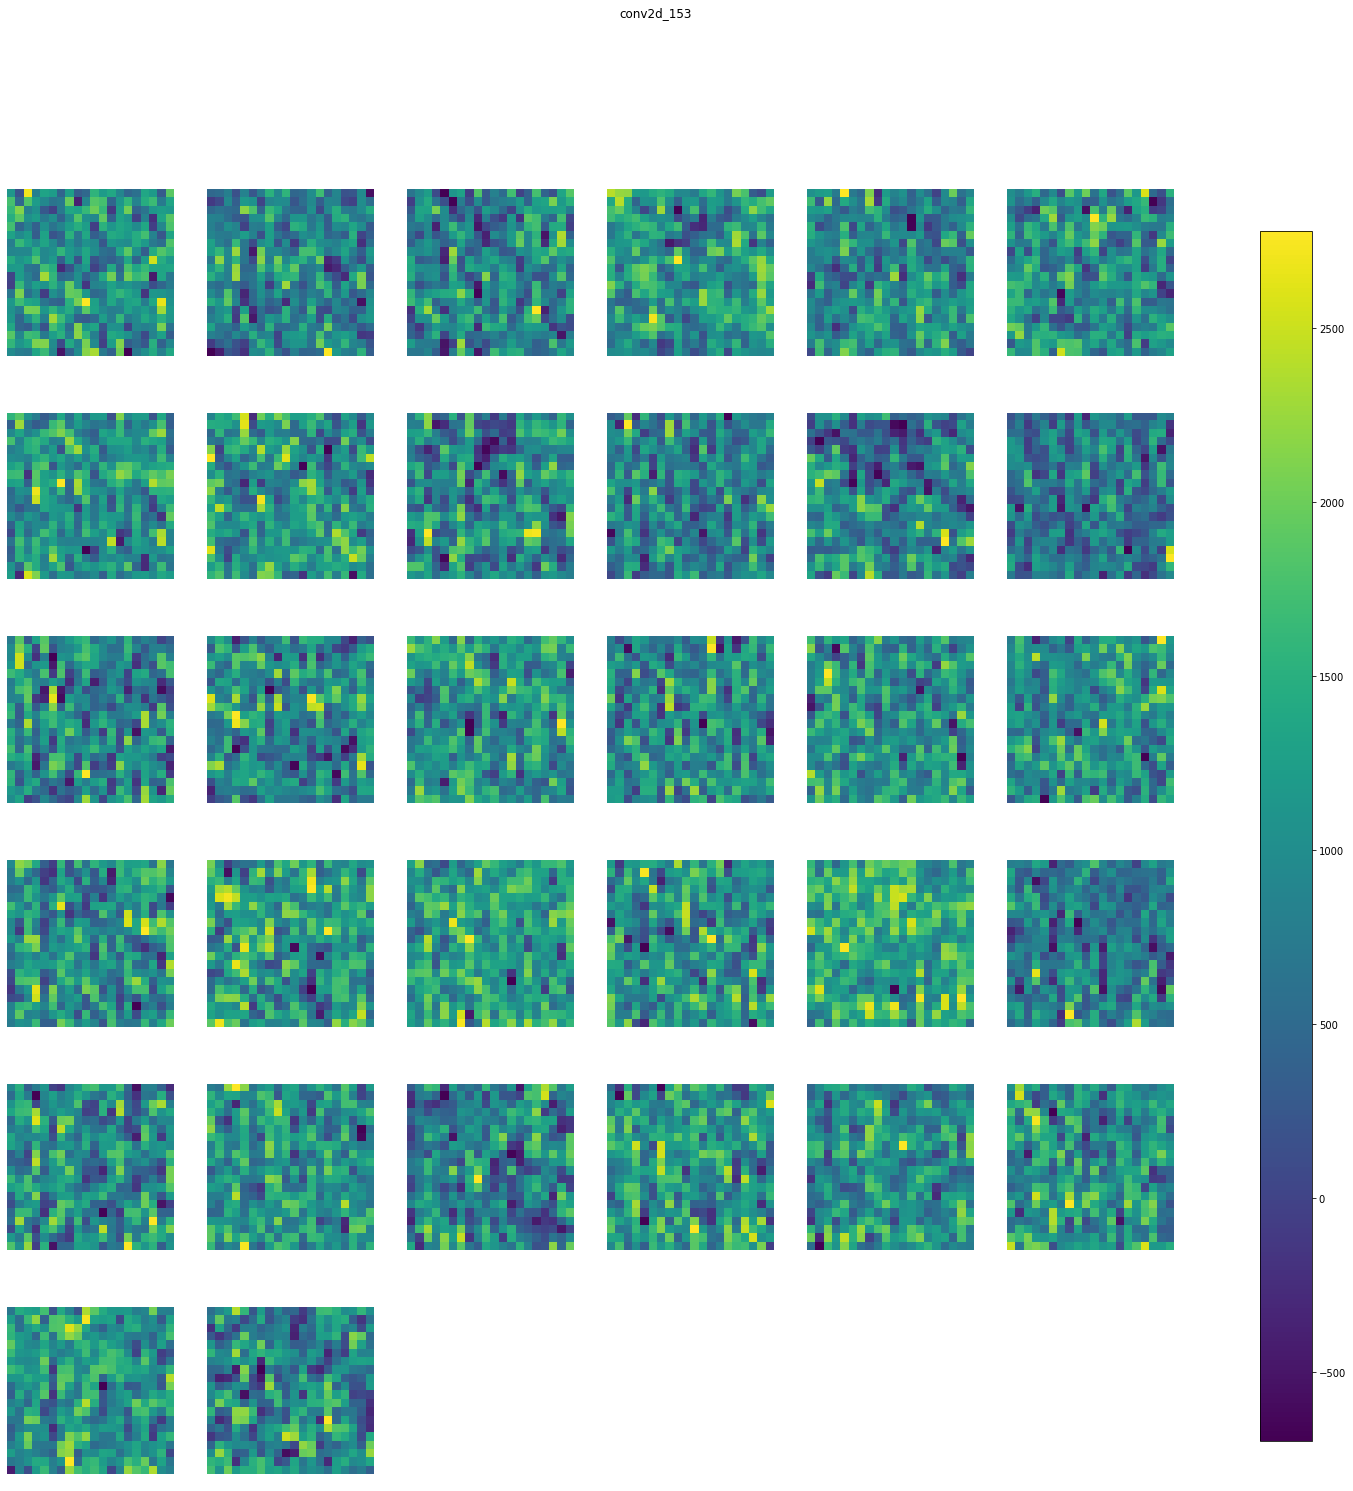

batch_normalization_255 (1, 20, 20, 32) 


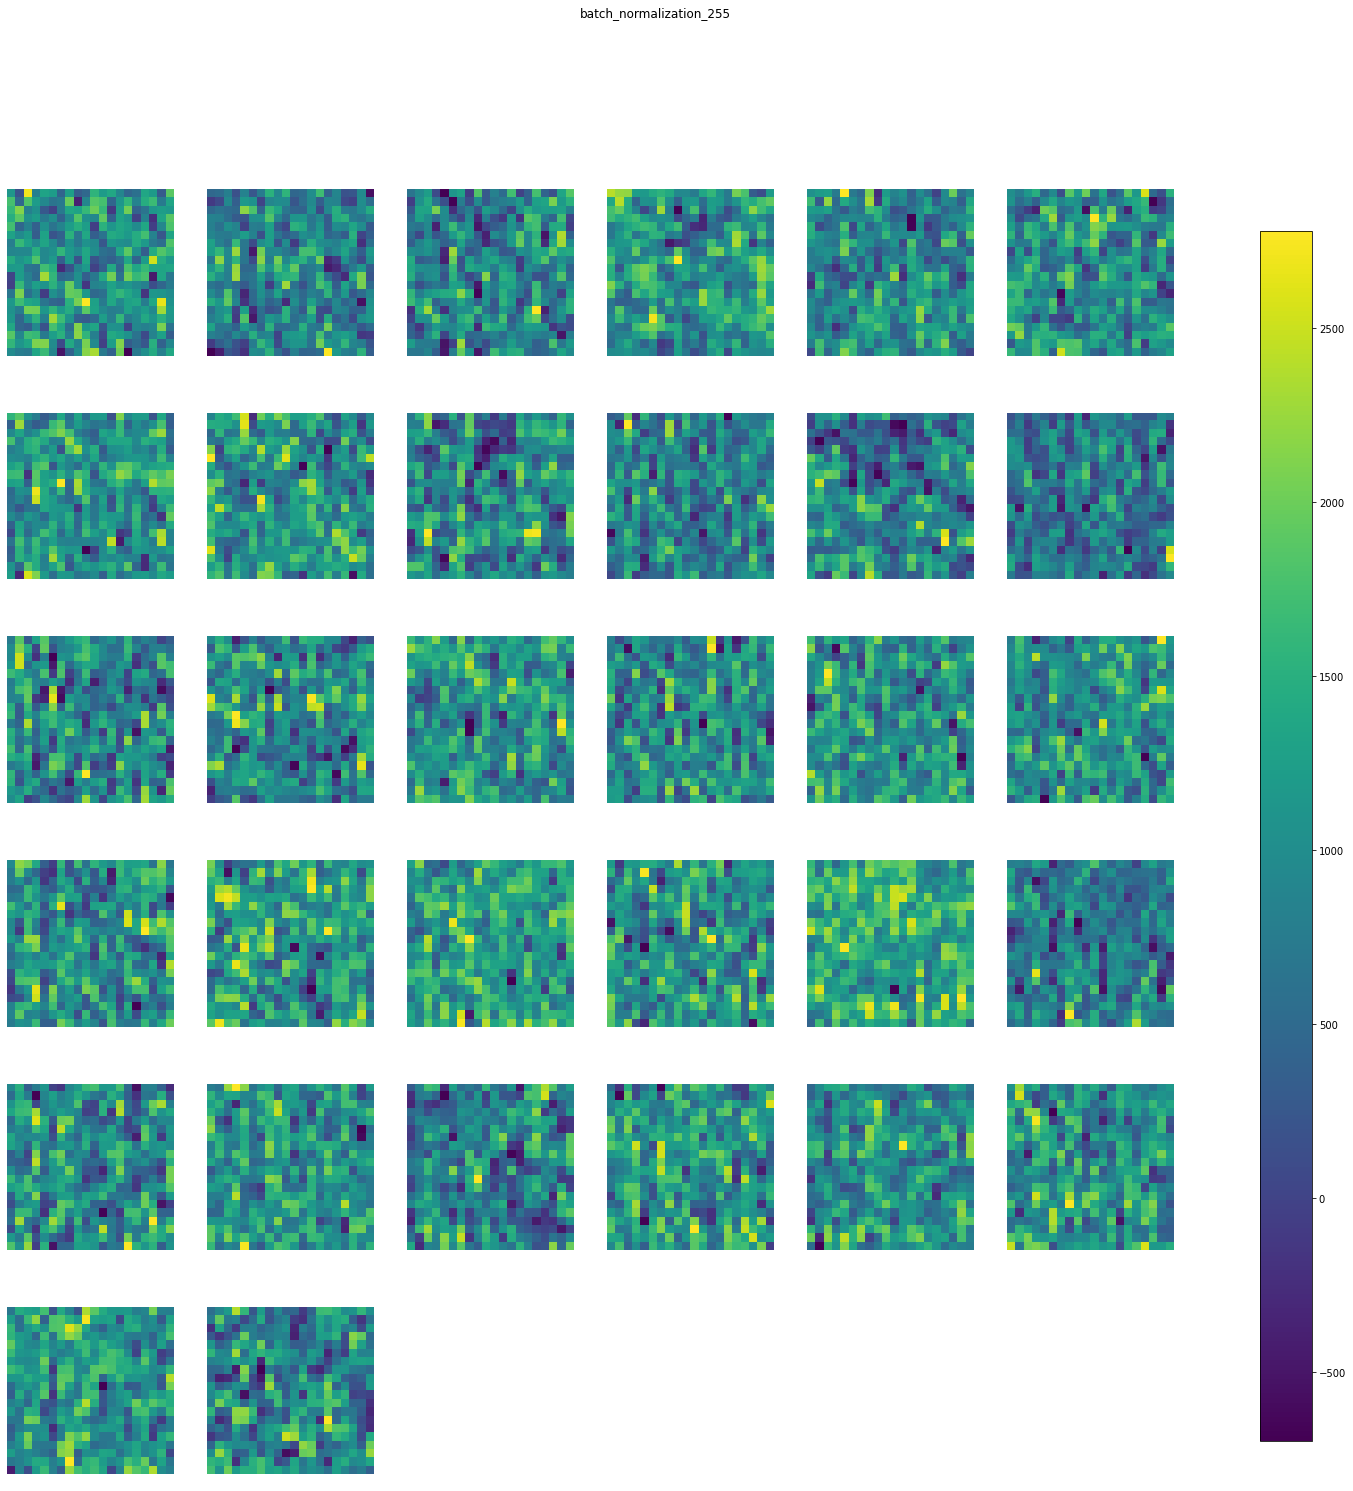

activation_255 (1, 20, 20, 32) 


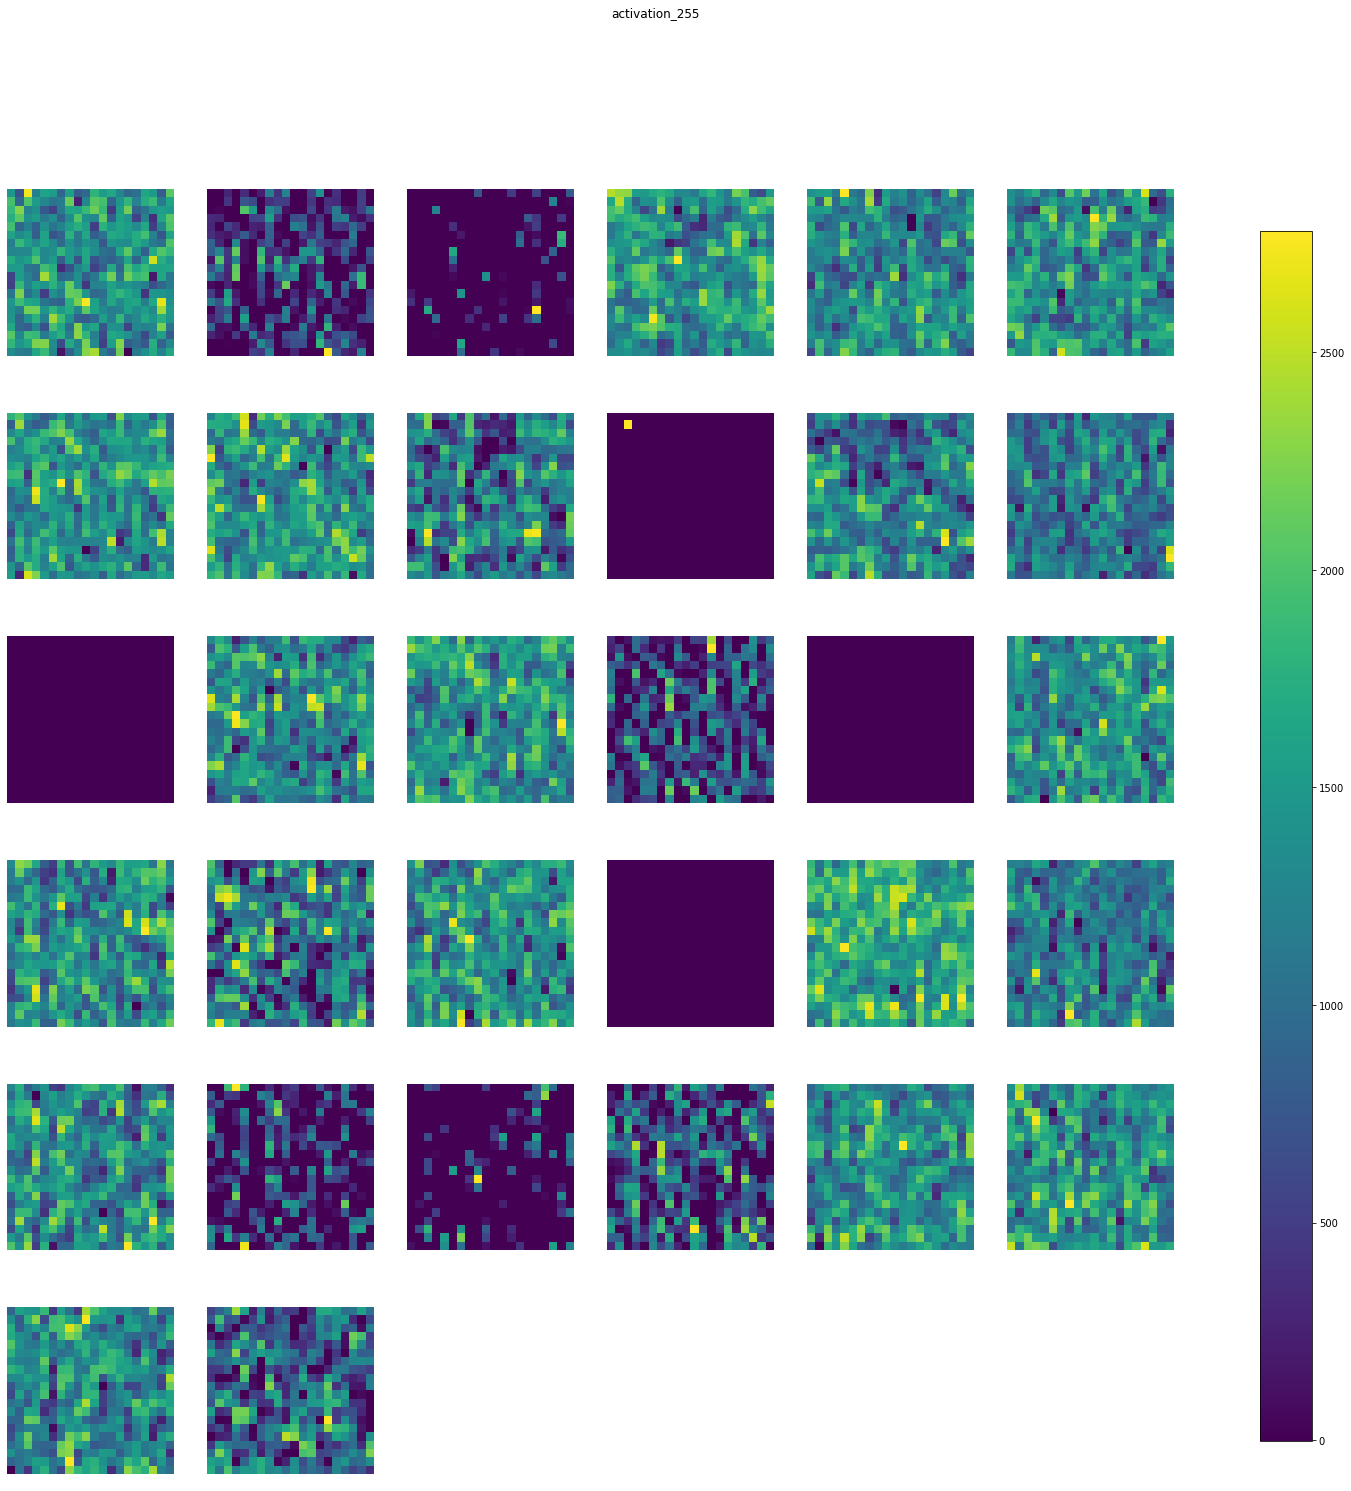

conv2d_154 (1, 9, 9, 64) 


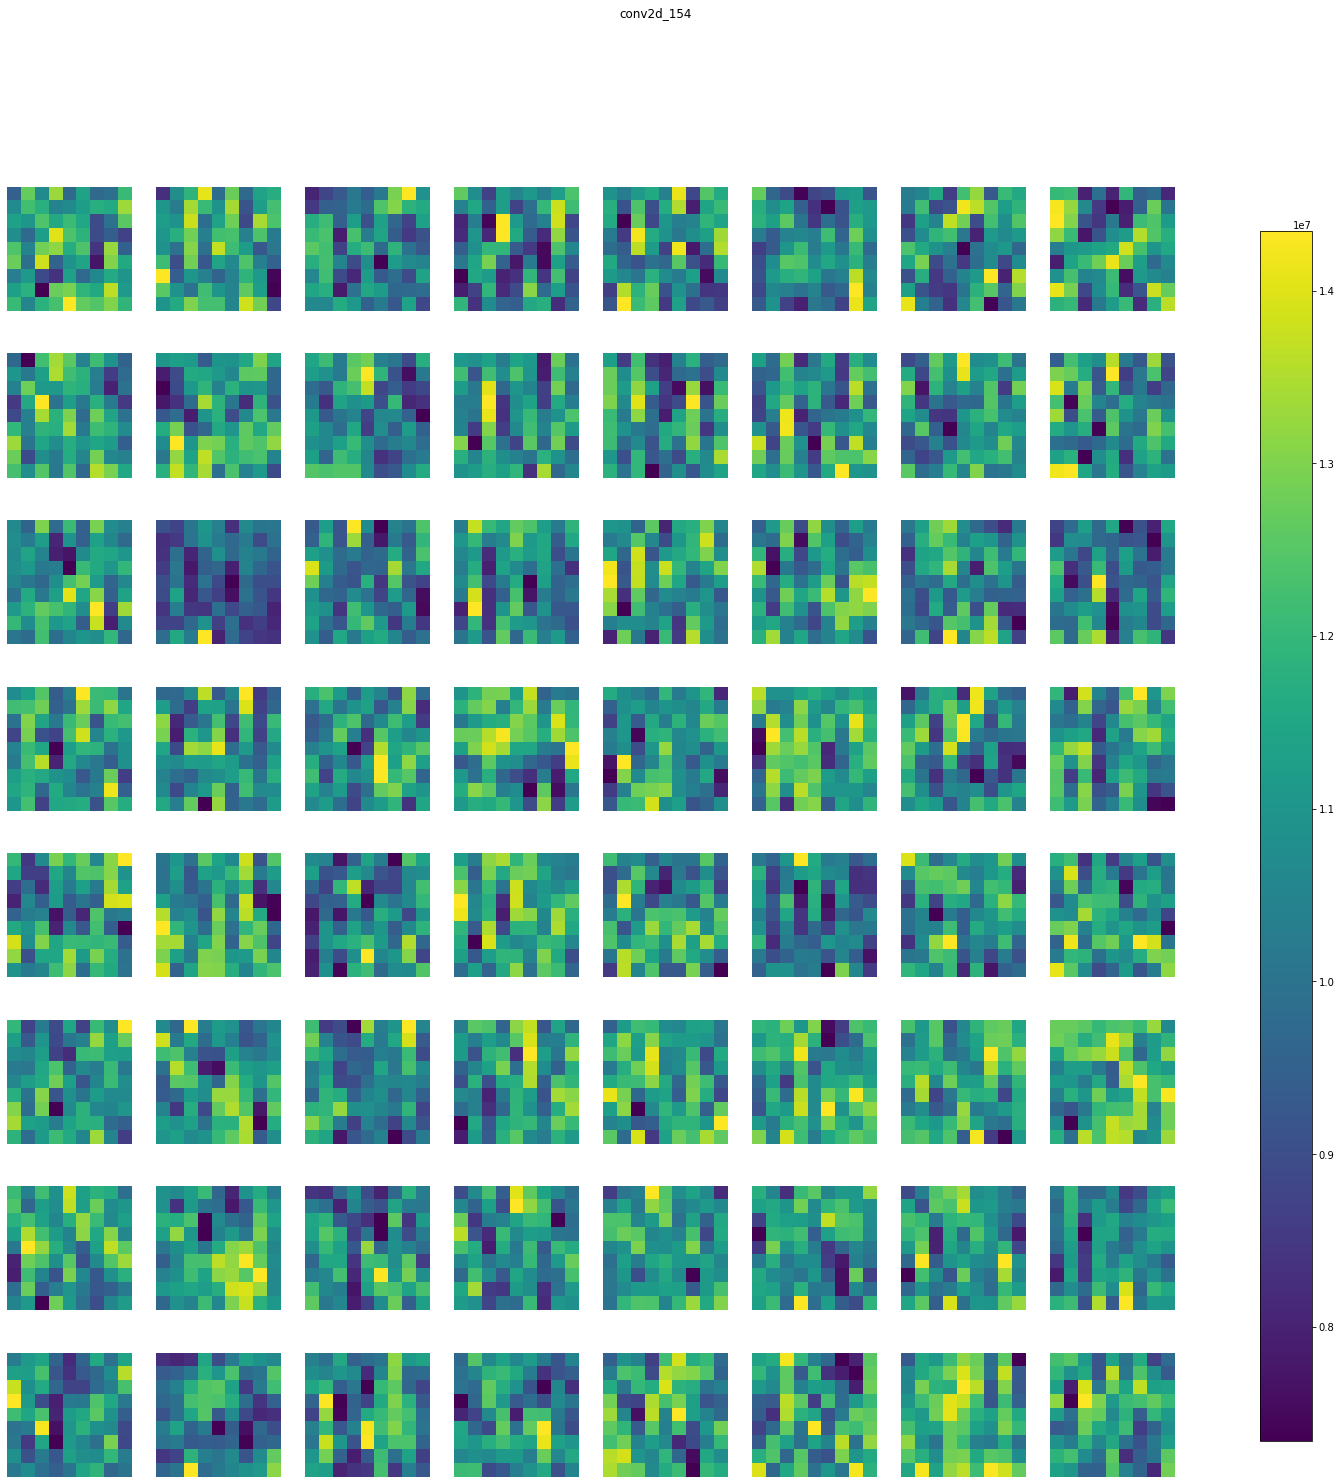

batch_normalization_256 (1, 9, 9, 64) 


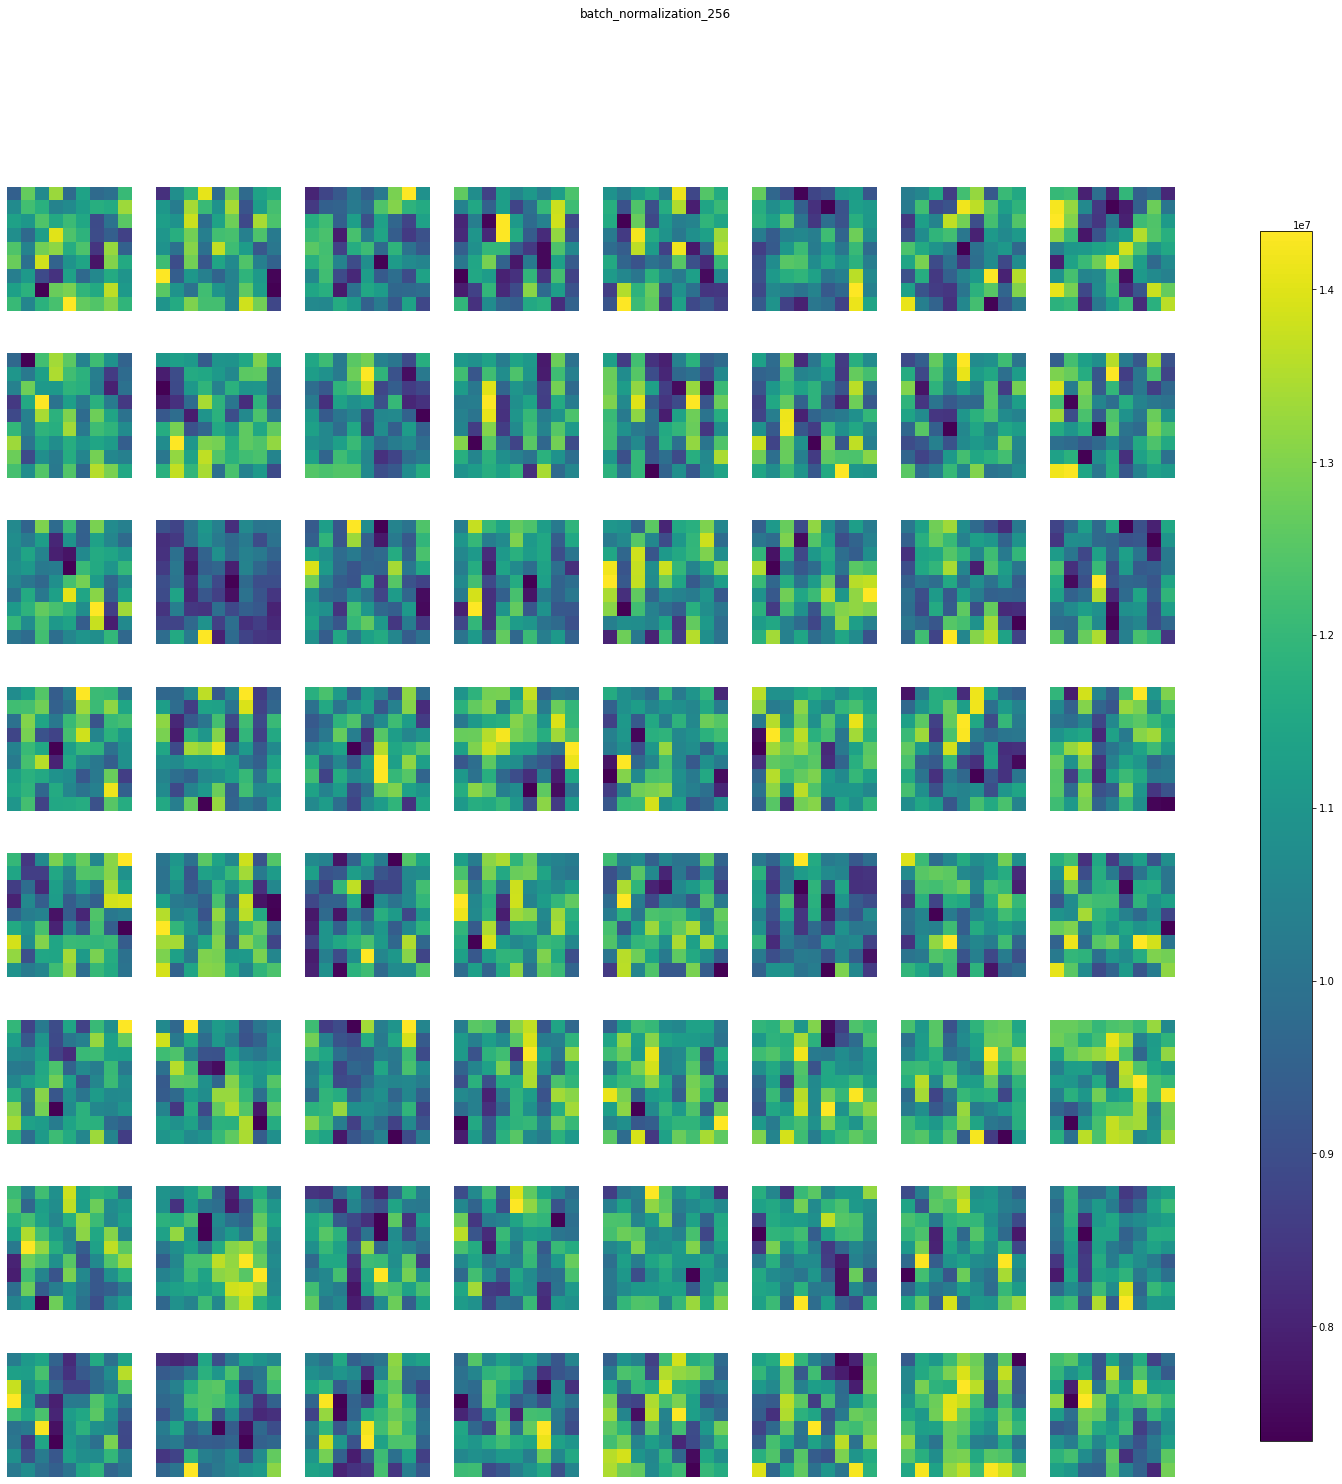

activation_256 (1, 9, 9, 64) 


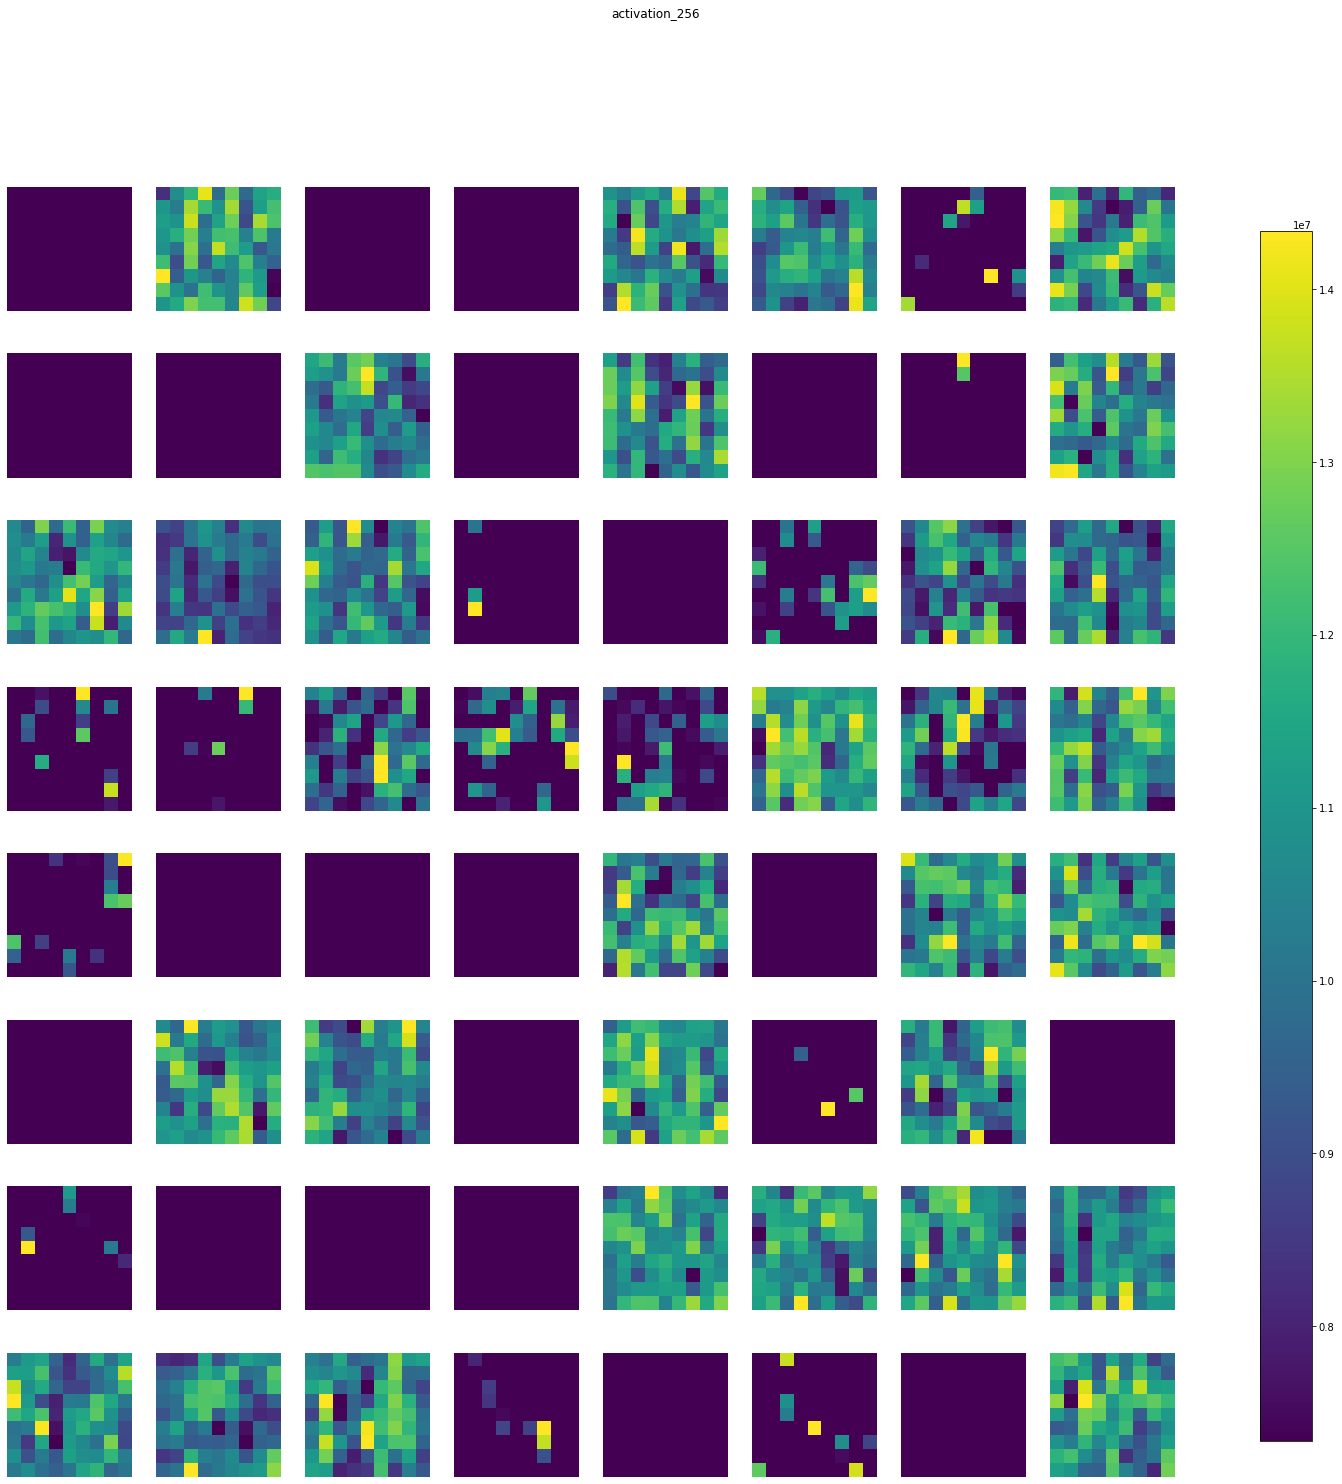

conv2d_155 (1, 7, 7, 64) 


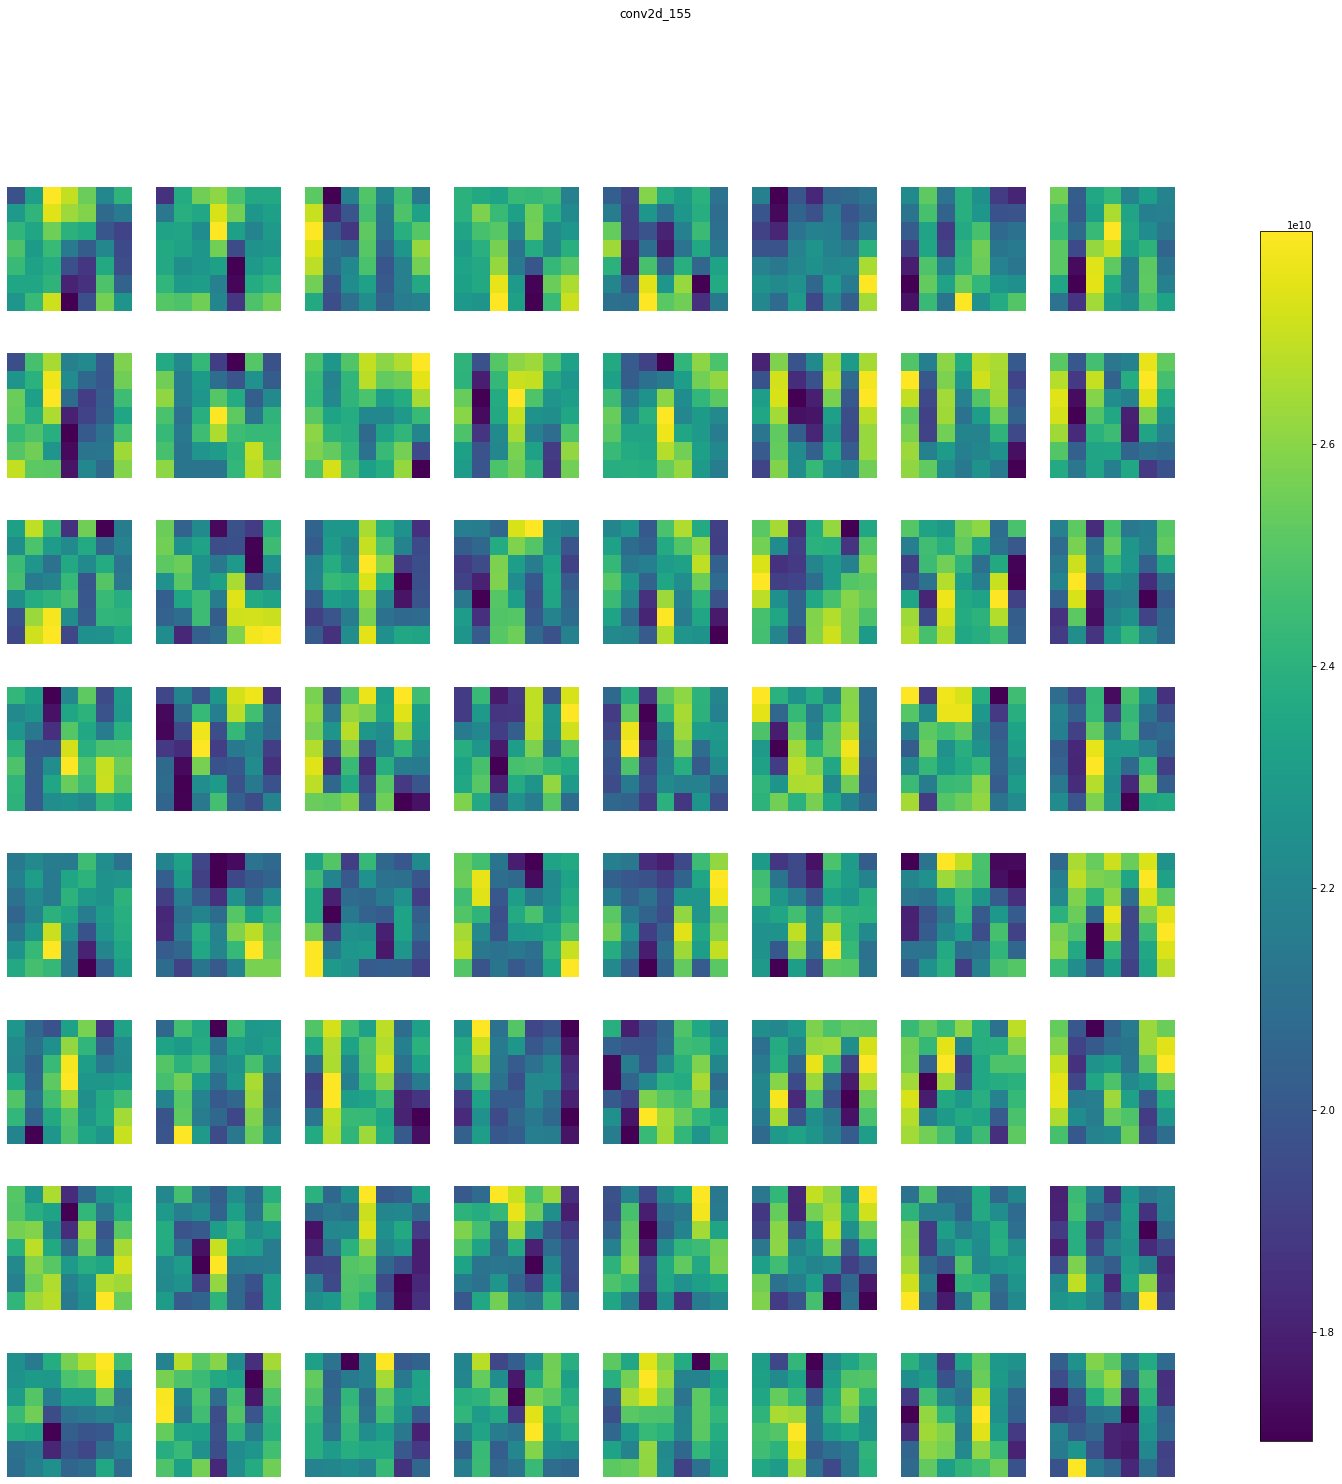

batch_normalization_257 (1, 7, 7, 64) 


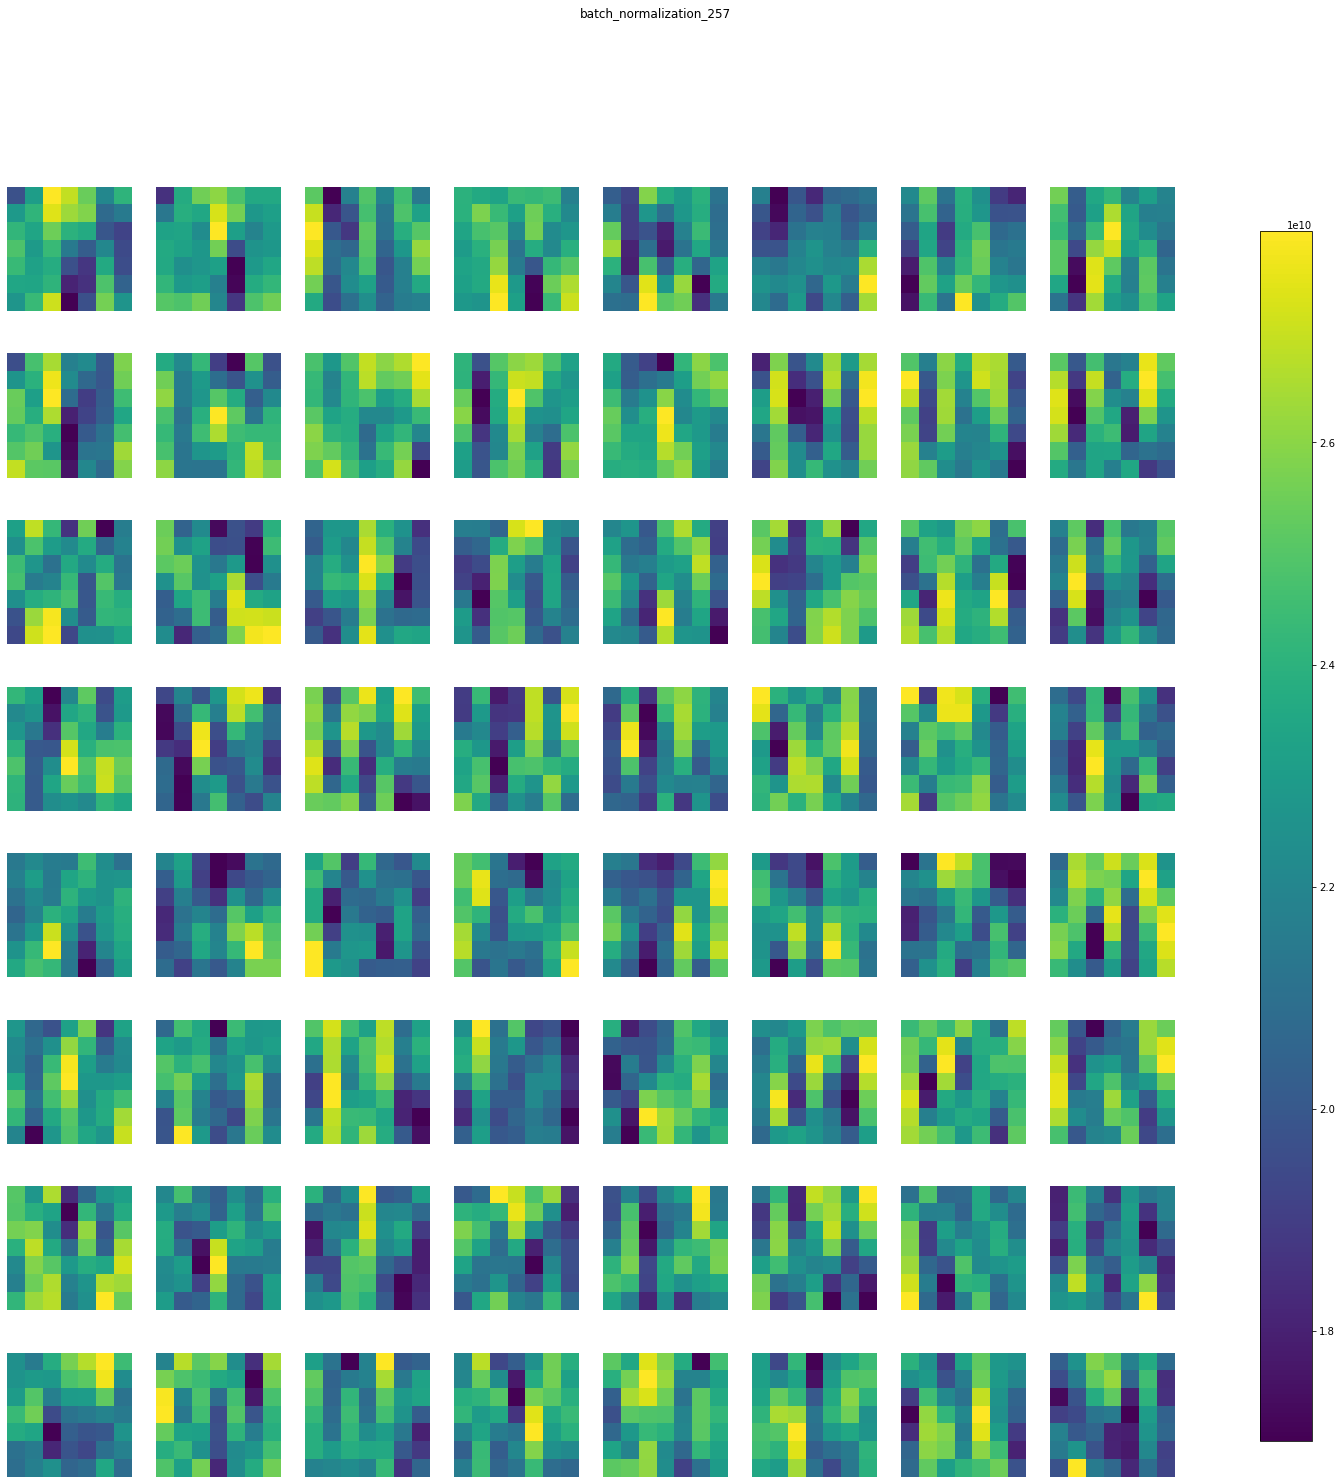

activation_257 (1, 7, 7, 64) 


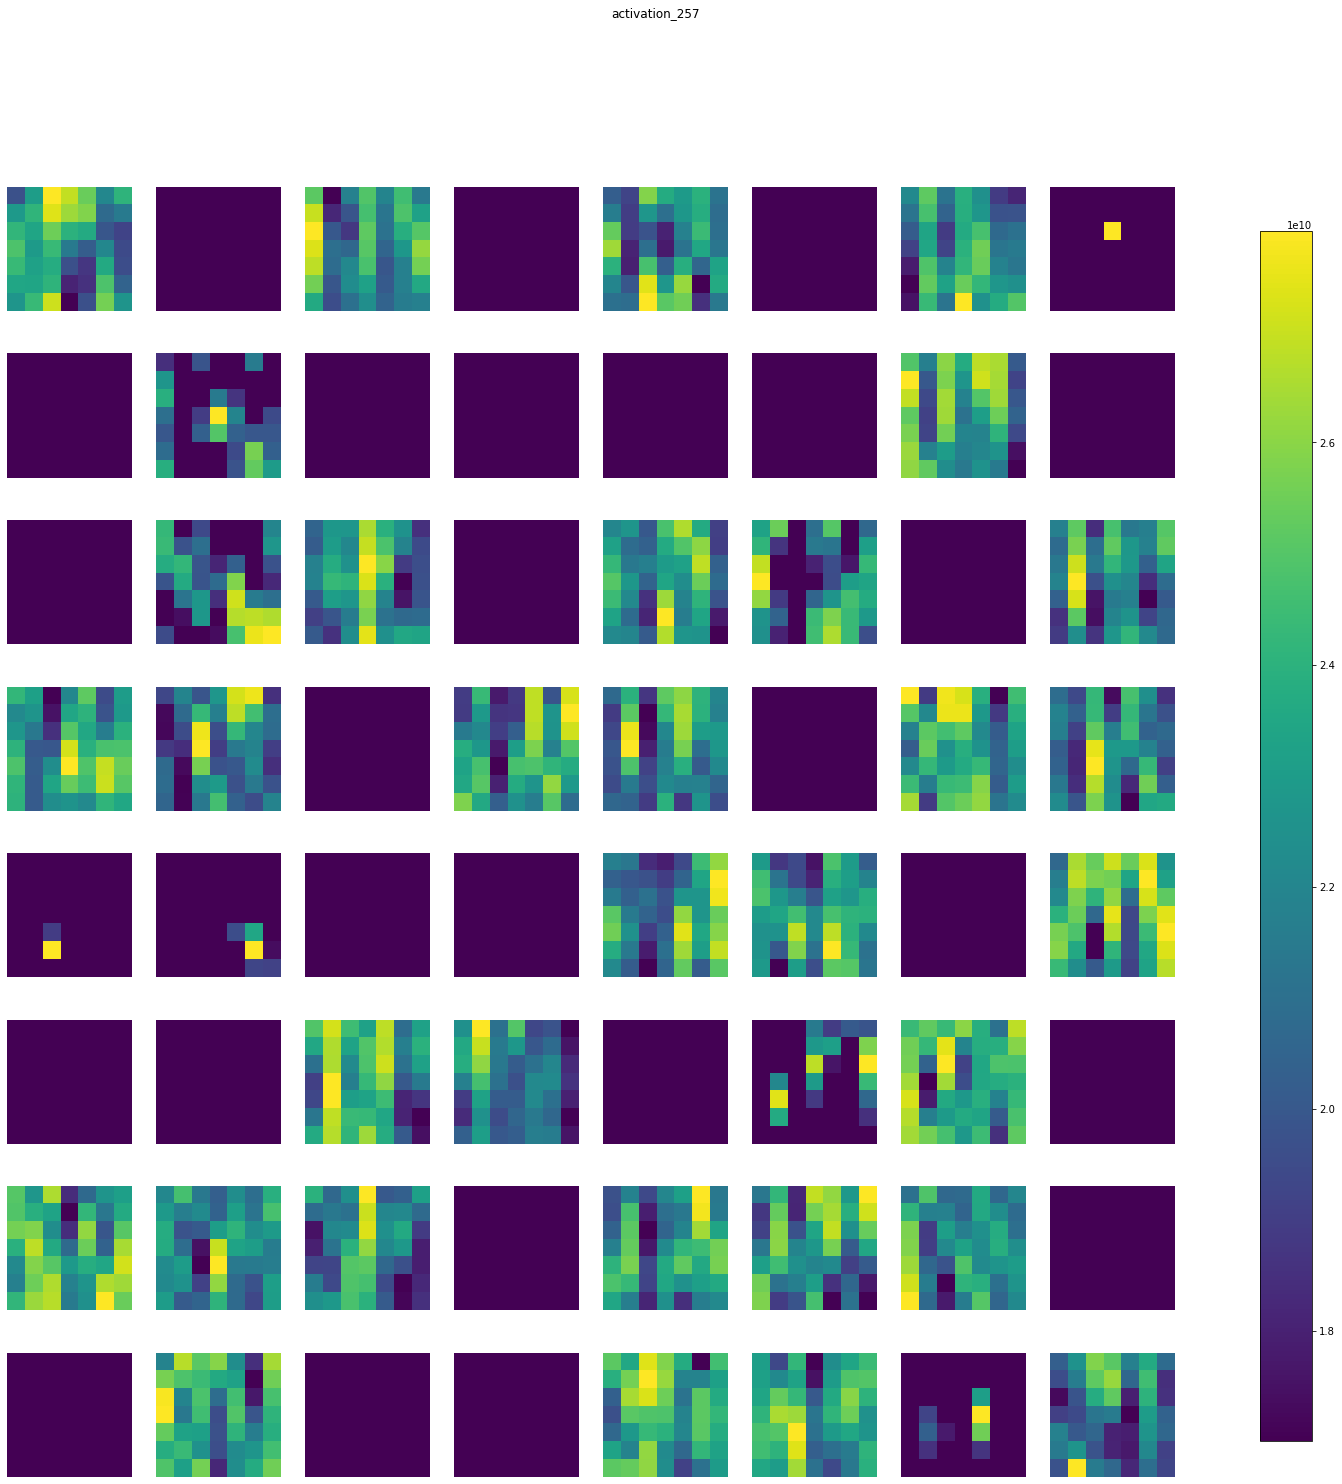

flatten_51 (1, 3136) 


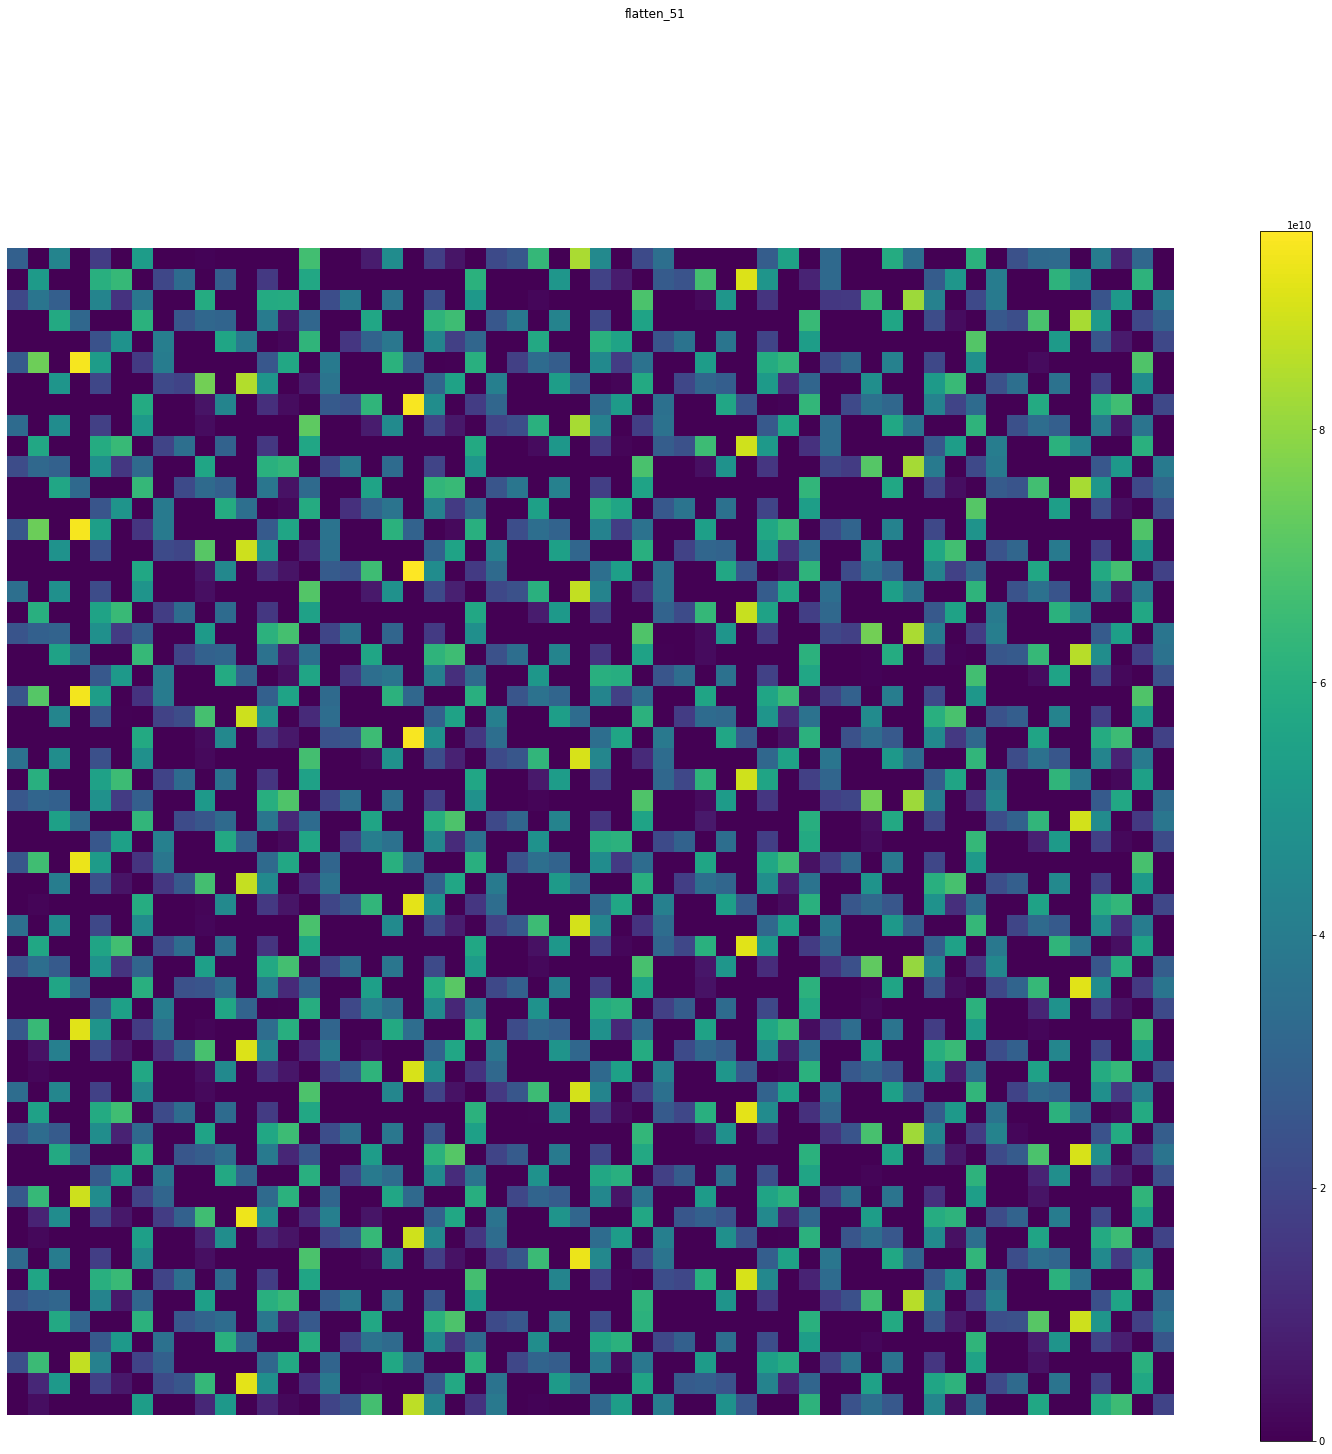

dense_102 (1, 512) 


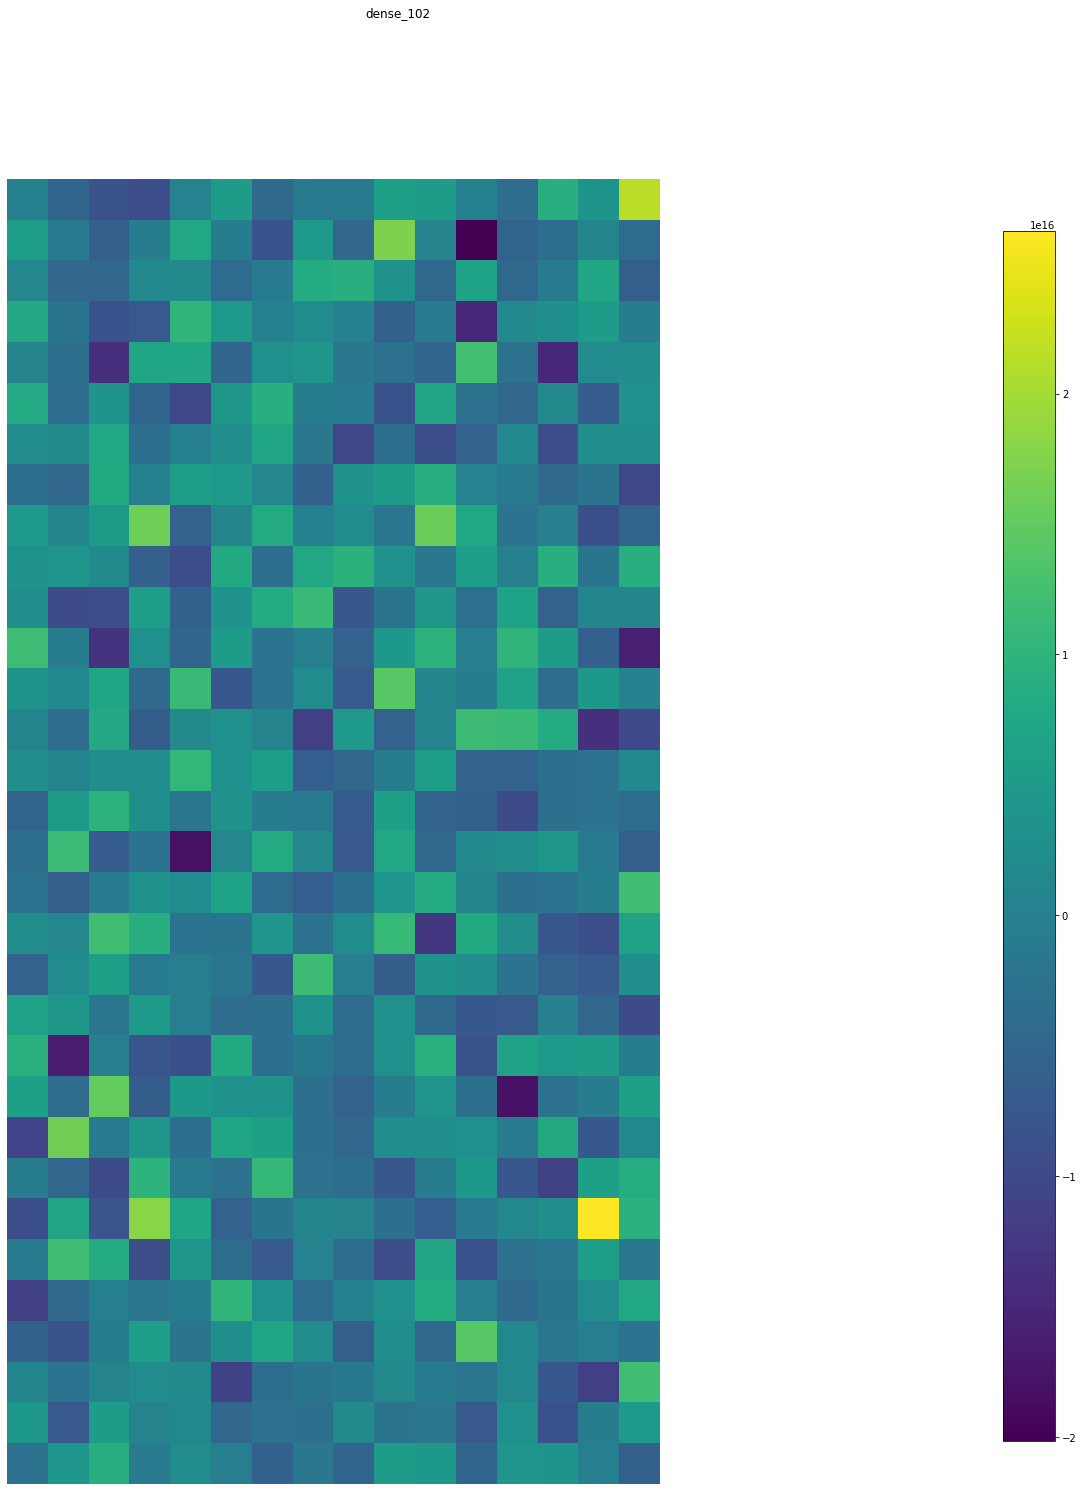

batch_normalization_258 (1, 512) 


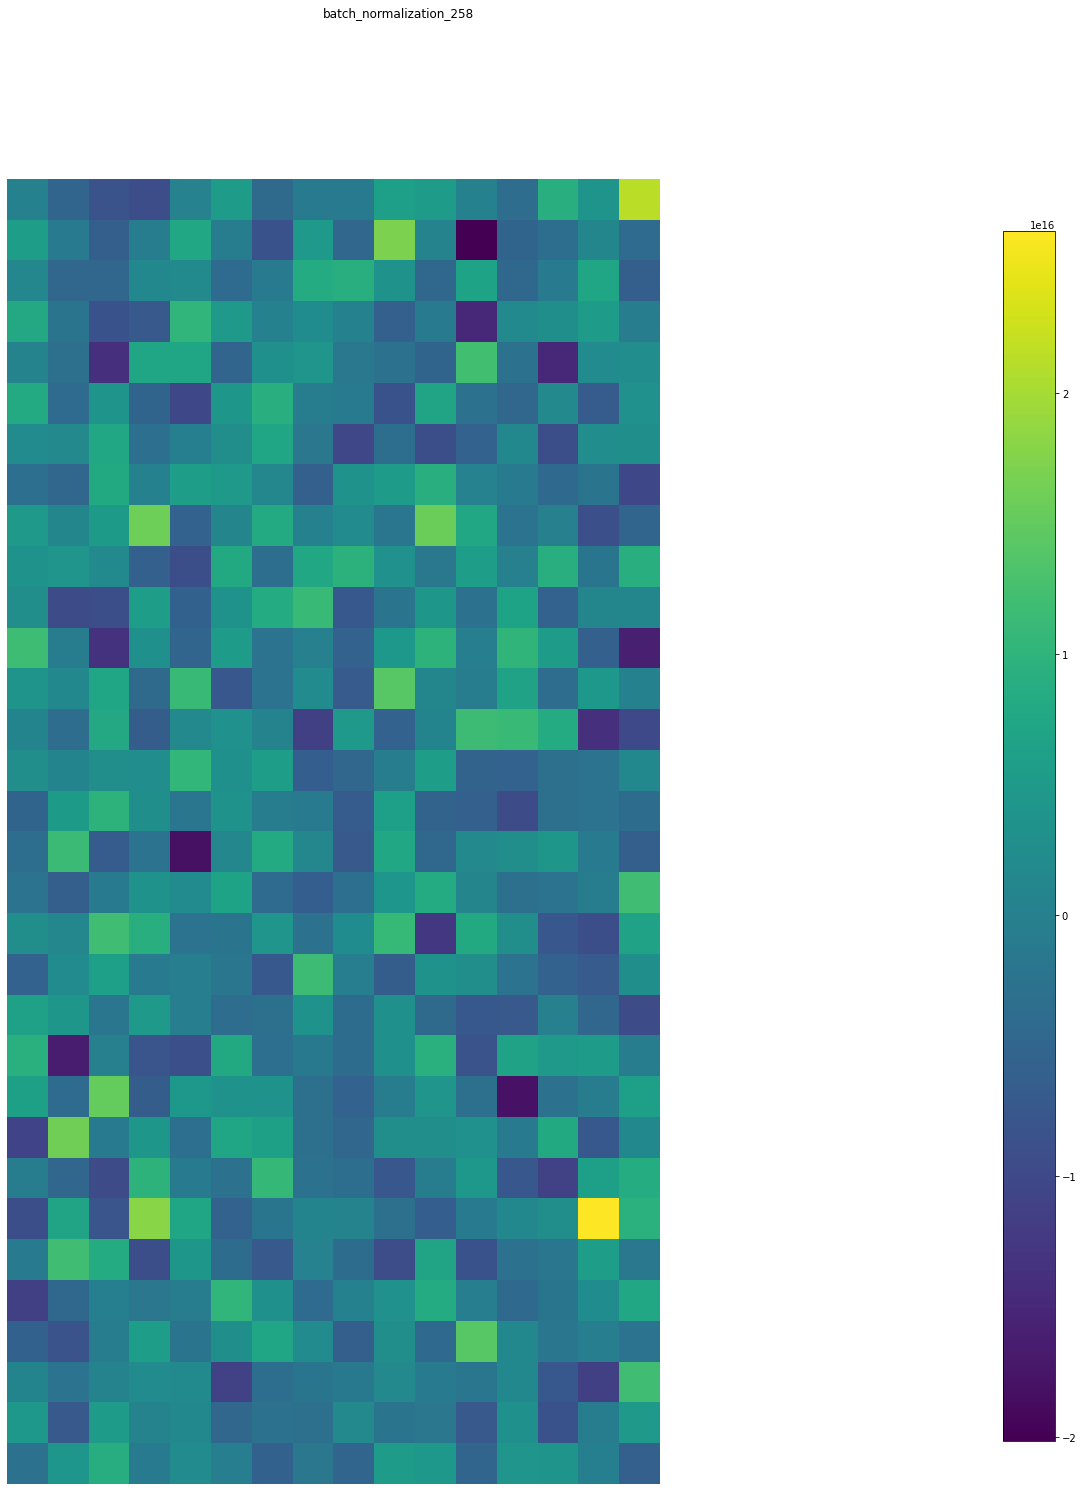

activation_258 (1, 512) 


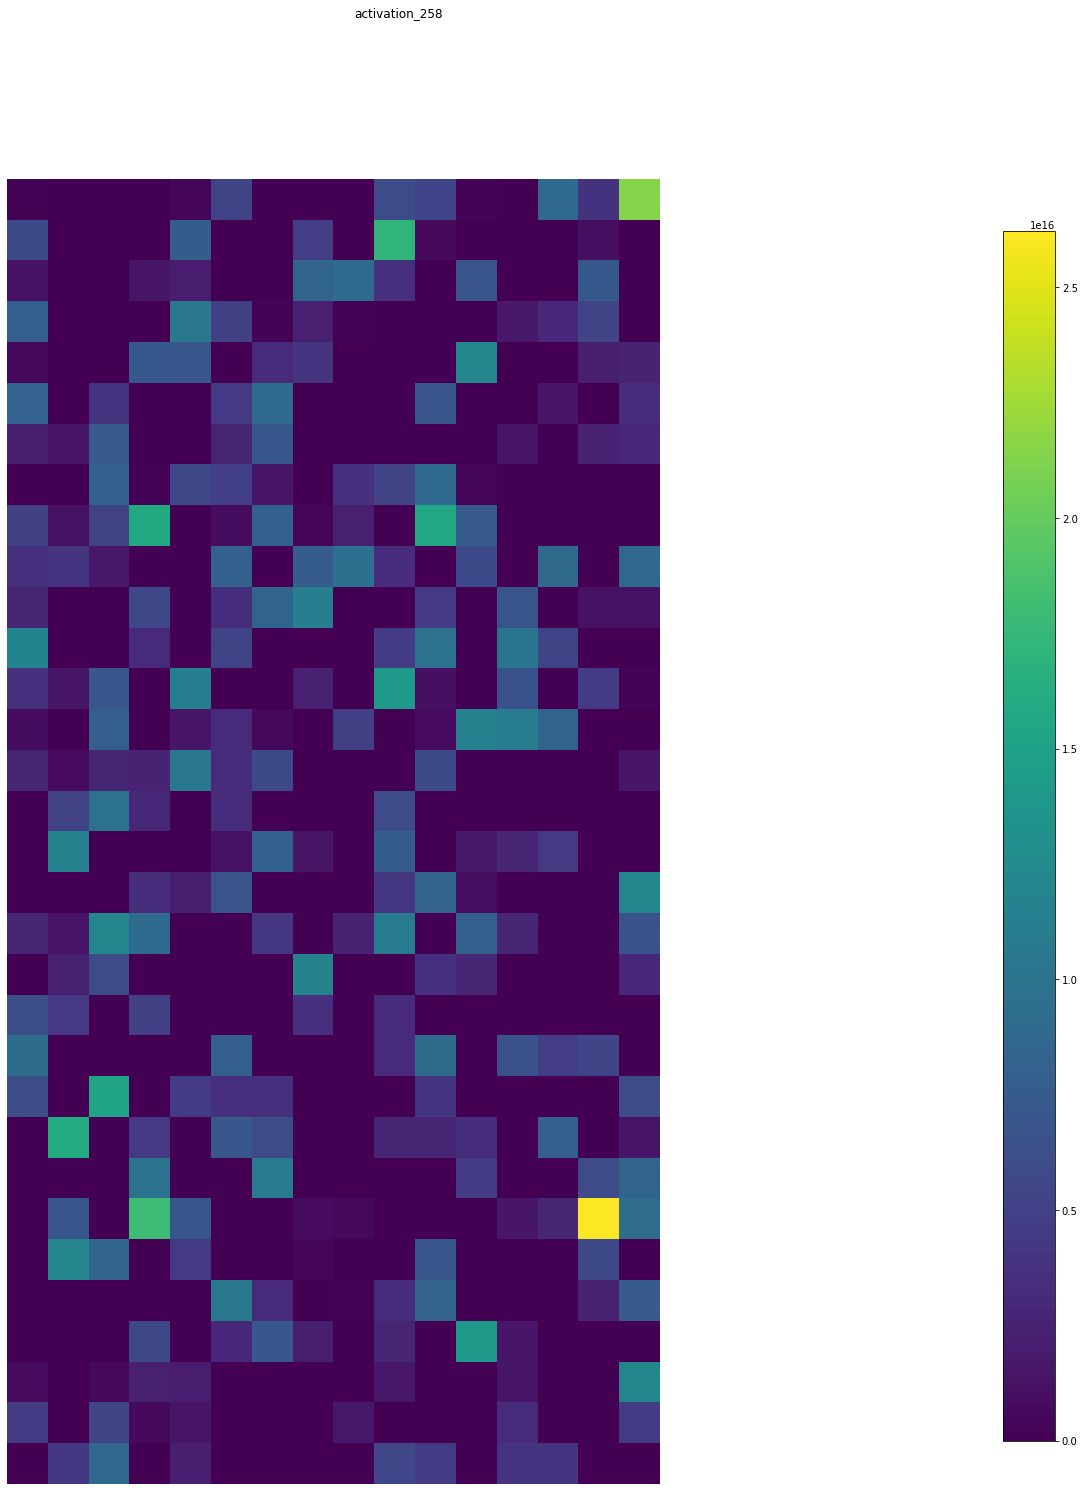

dense_103 (1, 4) 


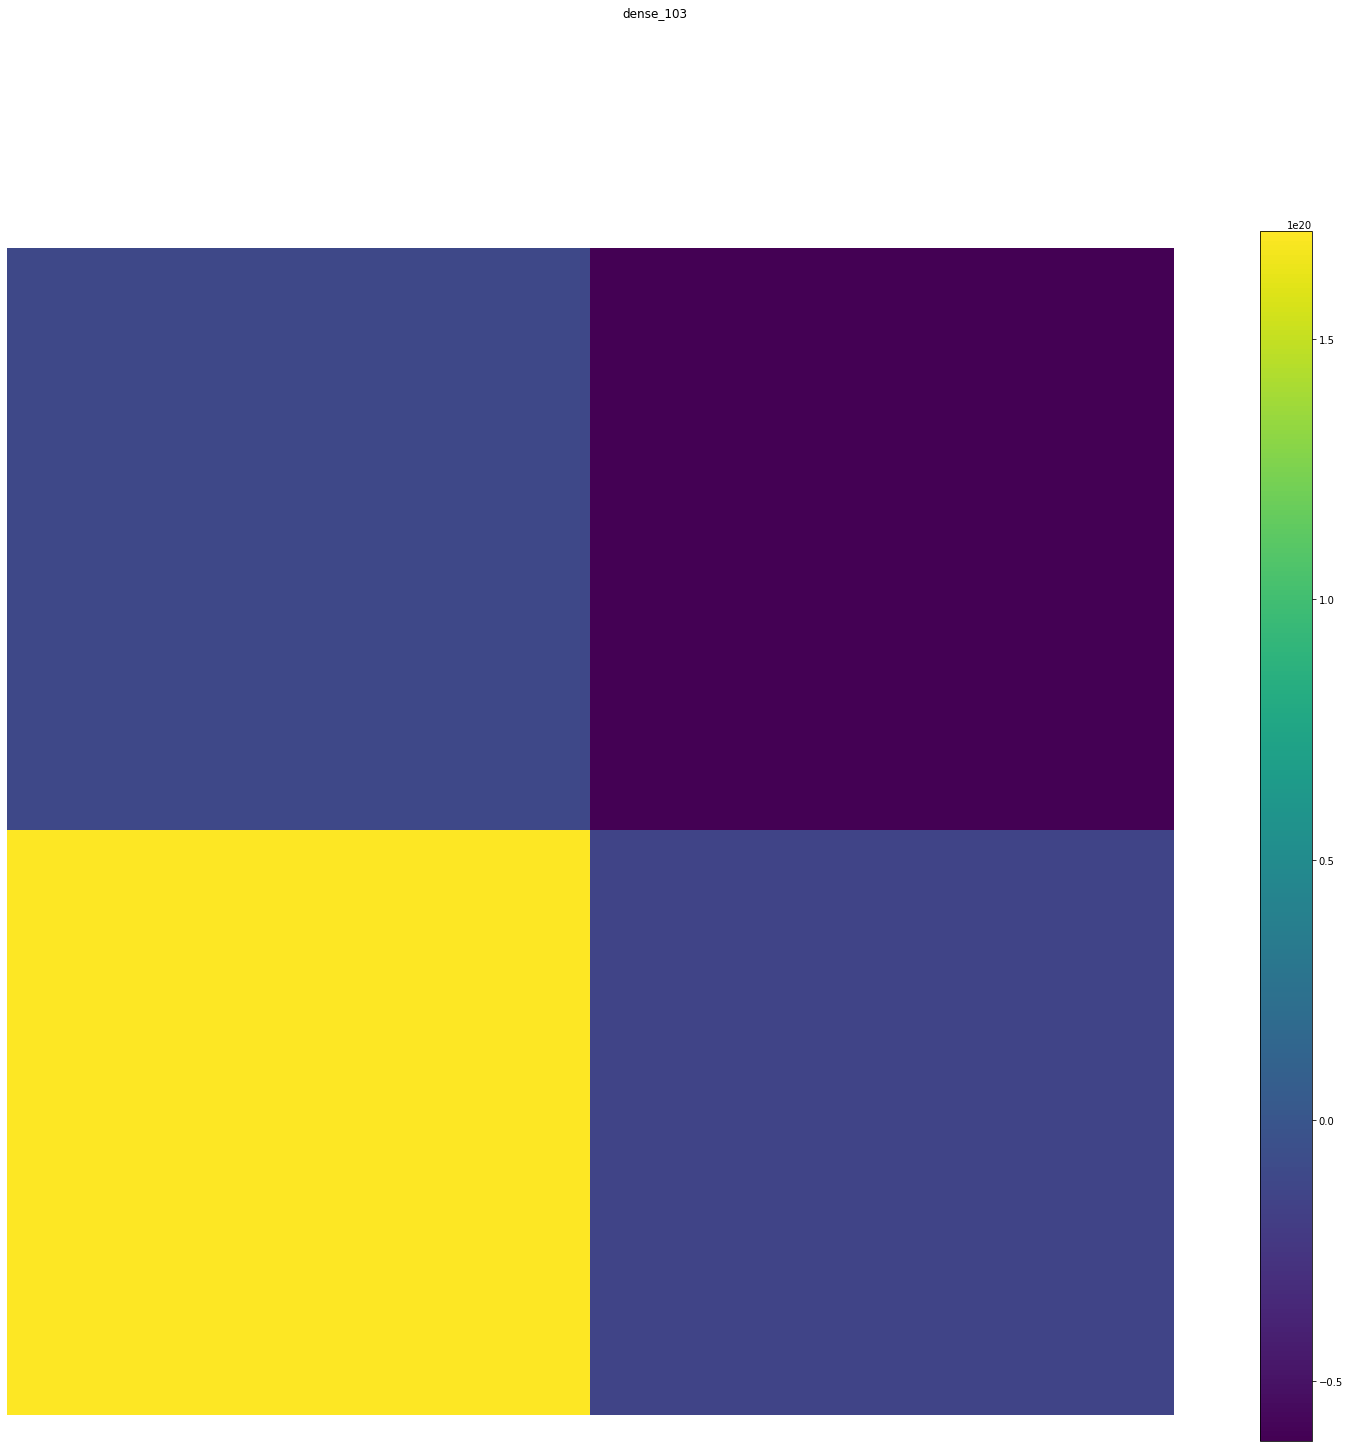

batch_normalization_259 (1, 4) 


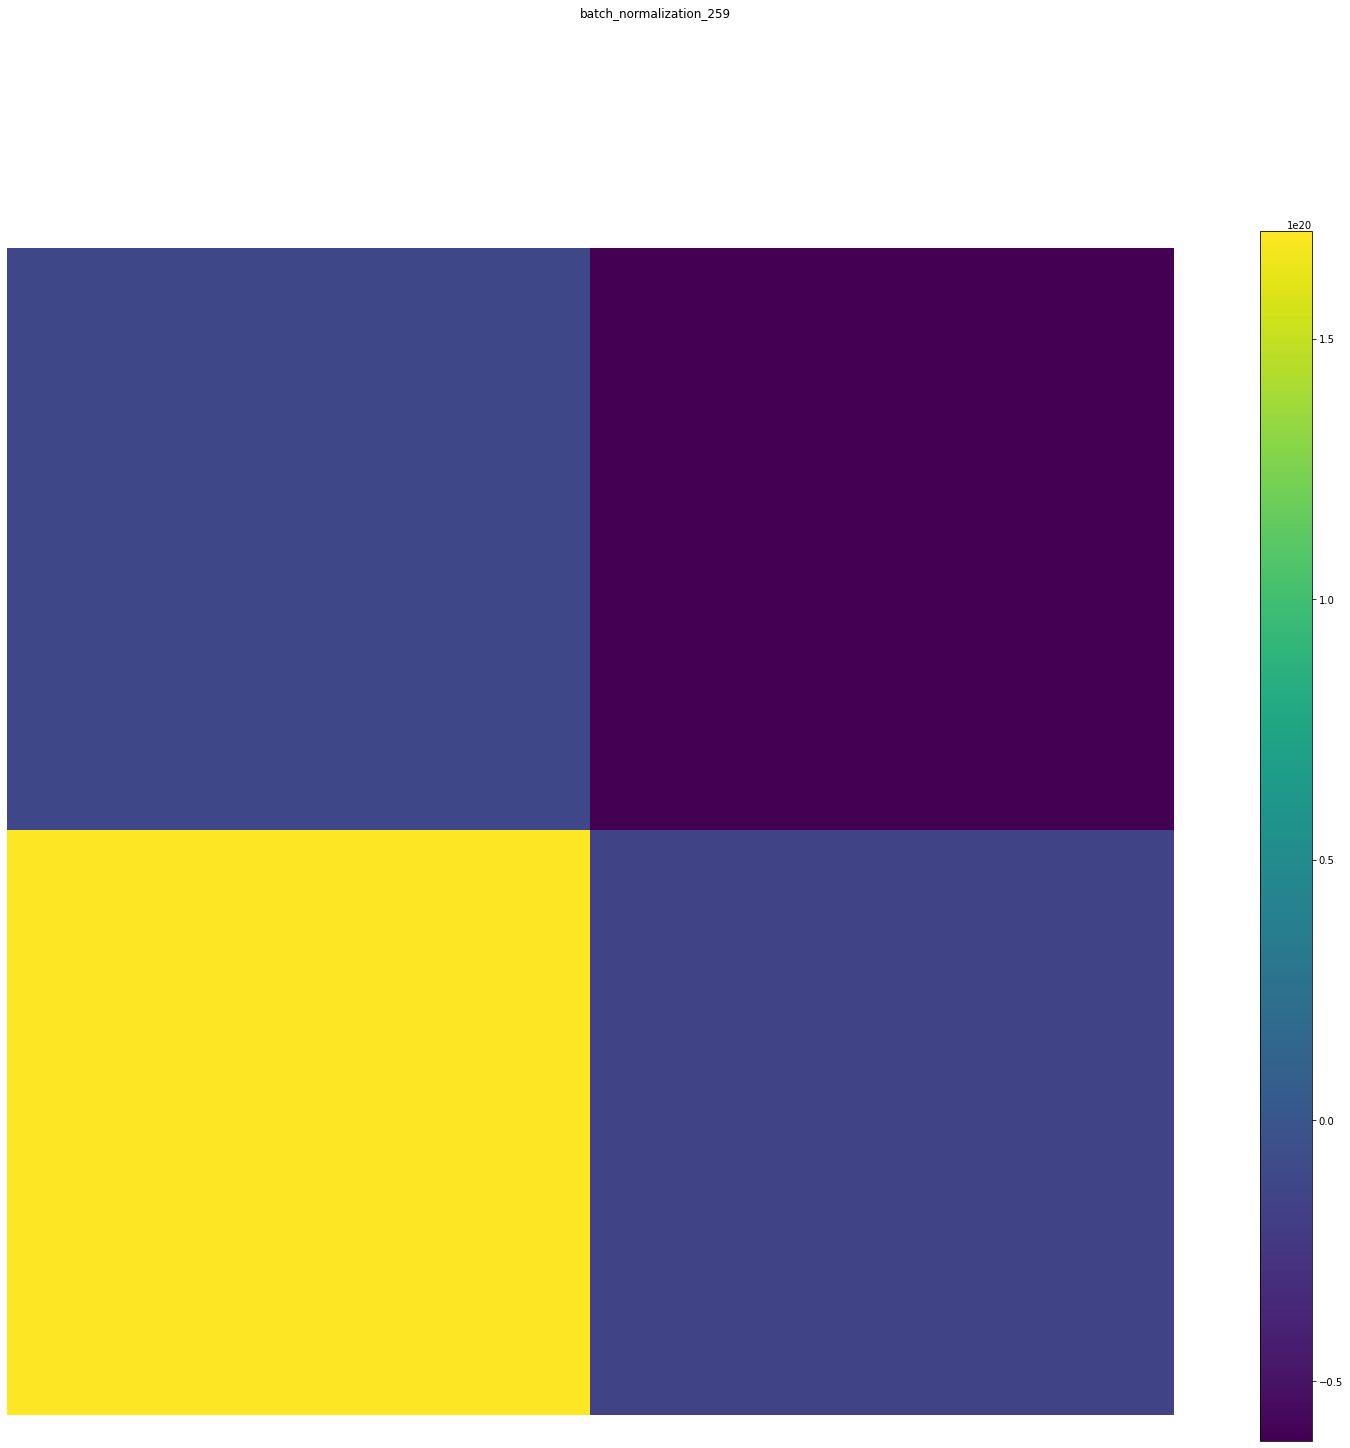

activation_259 (1, 4) 


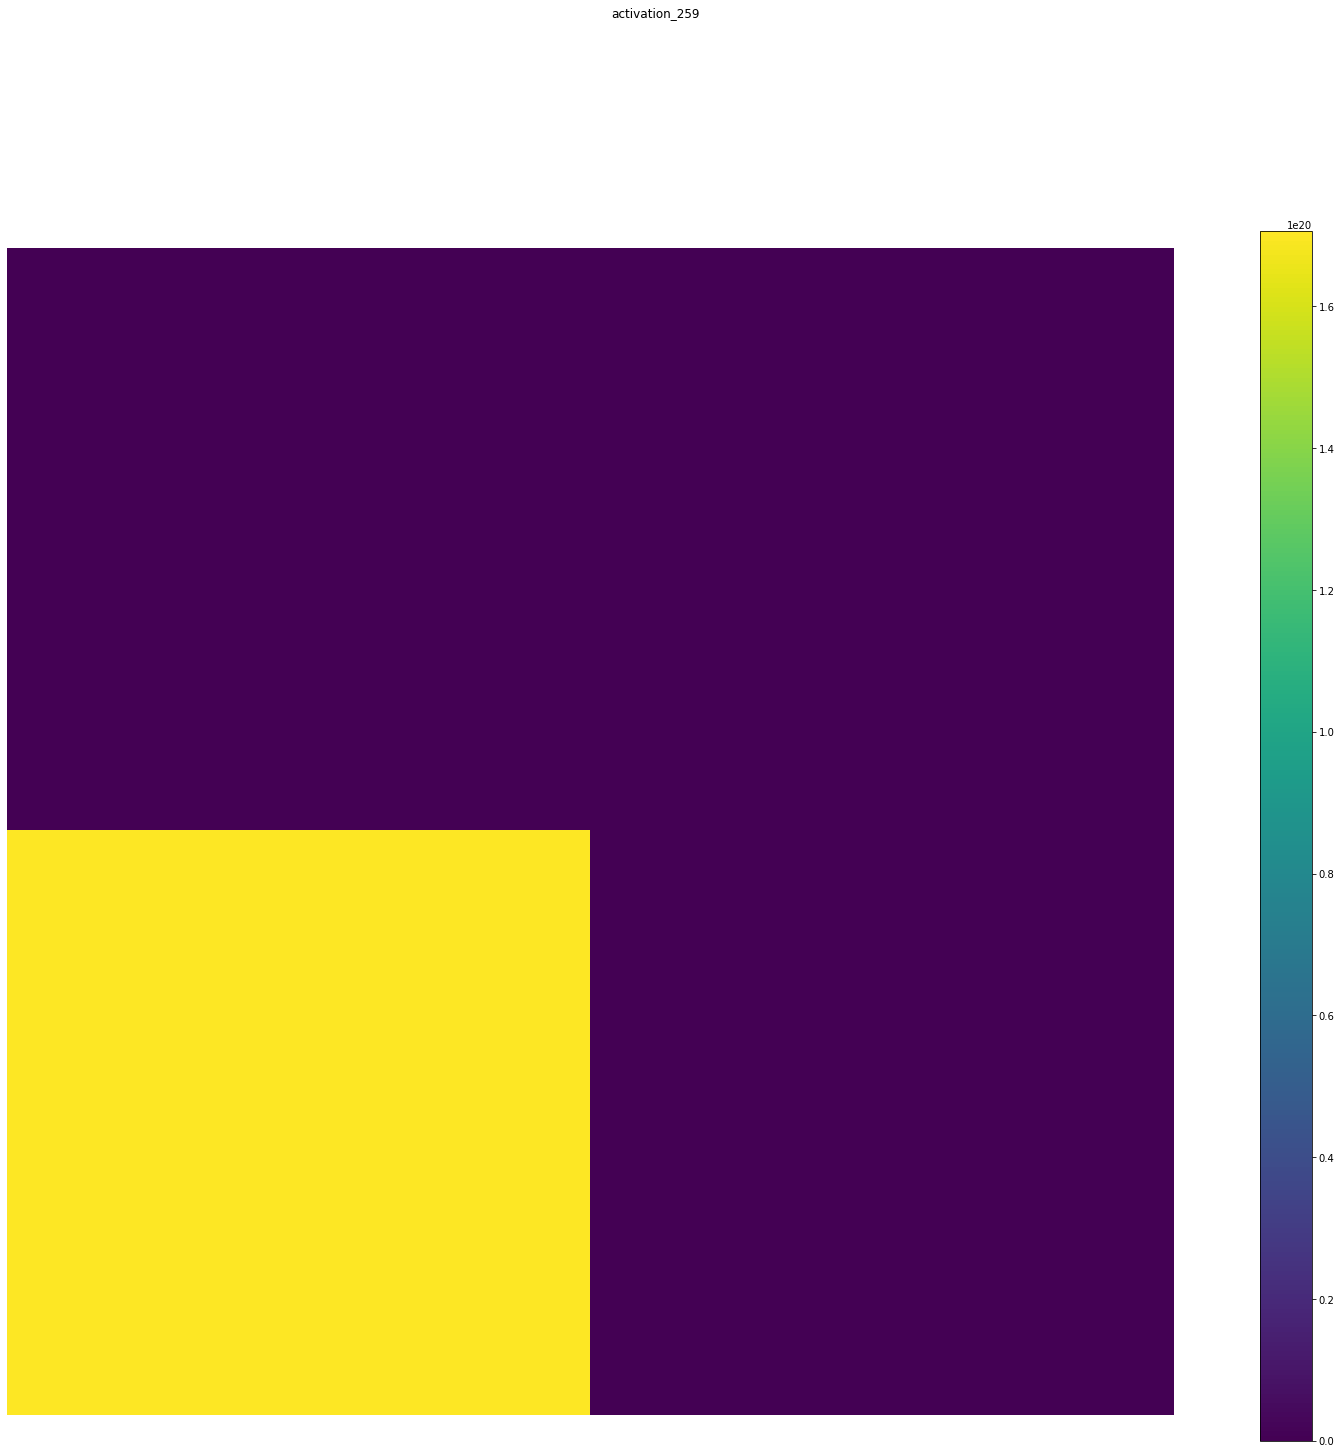

In [39]:
act = keract.get_activations(models[0],random_test_input)
keract.display_activations(act,reshape_1d_layers=True)